# **Cinema Through Time: How Seasons and History Shape the Movies We Watch**

Our analysis explores the relationship between cinema, major historical events, and seasonal trends, examining how genres, themes, and revenues in movies evolve in response to societal shifts and audience preferences. Through this project, we aim to reveal how cinema evolves as a cultural medium, responding dynamically to both historical events and seasonal influences. By mapping patterns over time, we hope to contribute to a deeper understanding of how films resonate with audiences during different historical and cultural contexts, highlighting cinema’s role as both a reflection and an influencer of society.

### **Objectives**
- **General Information About Movies**:
   - Gather and analyze basic details about movies, including release dates, genres, revenue, and popularity. This foundational understanding will provide context for deeper analyses and trends.
- **Historical Influence on Film Genres and Themes**: 
   - Analyze the impact of major historical events, such as world wars and economic crises, on film genres and themes.
   - Examine how cinema reflects societal shifts and concerns, capturing the essence of different eras through the types of stories told.

- **Seasonal Patterns in Movies**:
   - Identify seasonal trends in genre popularity, aligning with cultural events and holidays.
   - Explore how certain genres, like horror or family movies, may resonate more with audiences during specific times of the year.
   - Assess the role of timing in maximizing box office performance, considering how release seasons affect audience engagement.

- **Sentiment Analysis of Plot Summaries**:
   - Capture the emotional tone of movies by analyzing the sentiment in plot summaries.
   - Track variations in sentiment across seasons and historical periods, examining how cinema reflects the emotional climate of its time.


### **Datasets**

We are utilizing two primary datasets in this project: the *CMU* dataset and the *TMDB Movies Dataset* from Kaggle. The *CMU* dataset serves as our foundational source, providing detailed information on genres, release dates, and thematic elements, which are essential for analyzing the relationship between movies, historical events, and seasonal patterns. 

To complement the *CMU * dataset, we incorporated the *TMDB Movies Dataset*, a comprehensive movie database that includes additional features such as ratings, revenue, and popularity scores. Integrating this dataset adds depth to our analysis, especially by enriching financial insights and addressing missing values within the *CMU s* dataset. This combined approach allows us to leverage the strengths of both datasets, ensuring a more robust and accurate exploration of cinema’s evolution over time.


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.data.data_loader import *
from src.utils.EDA import *
from src.utils.historical import *
from src.utils.sentimental_analysis import *
from src.utils.sesonal import *

In [5]:
movies_df = data_loader_movies()
print("Movie Metadata Sample:")
movies_df.info()

Movie Metadata Sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81628 entries, 0 to 81627
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikipedia_id  81628 non-null  int64  
 1   freebase_id   81628 non-null  object 
 2   name          81628 non-null  object 
 3   languages     72754 non-null  object 
 4   countries     75822 non-null  object 
 5   budget        8290 non-null   float64
 6   popularity    49929 non-null  float64
 7   revenue       11032 non-null  float64
 8   runtime       67952 non-null  float64
 9   genres        81628 non-null  object 
 10  release_date  74850 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 6.9+ MB


In [6]:
print("\nSummary Statistics for Numeric Columns:")
movies_df.describe().T


Summary Statistics for Numeric Columns:


count          mean           std     min          25%  \
wikipedia_id  81628.0  1.739927e+07  1.098763e+07  330.00  7317442.250   
budget         8290.0  1.855514e+07  3.040164e+07    1.00  1250750.000   
popularity    49929.0  4.915950e+00  7.775740e+00    0.00        1.067   
revenue       11032.0  4.117780e+07  1.056461e+08    1.00  1500000.000   
runtime       67952.0  1.095071e+02  4.140910e+03    0.03       80.000   

                       50%           75%           max  
wikipedia_id  1.775422e+07  2.713261e+07  3.750192e+07  
budget        6.850000e+06  2.200000e+07  3.790000e+08  
popularity    2.171000e+00  5.572000e+00  3.007380e+02  
revenue       7.241692e+06  3.130311e+07  2.782275e+09  
runtime       9.300000e+01  1.080000e+02  1.079281e+06

### Handling Missing Values
The first step in our data cleaning process is to identify any missing values and decide on the appropriate strategy for handling them. Missing values can affect our analysis and models, so we will either fill them in with suitable values or remove the affected rows if necessary.


In [7]:
print("\nMissing Values in Each Column:")
print(movies_df.isnull().sum())


Missing Values in Each Column:
wikipedia_id        0
freebase_id         0
name                0
languages        8874
countries        5806
budget          73338
popularity      31699
revenue         70596
runtime         13676
genres              0
release_date     6778
dtype: int64


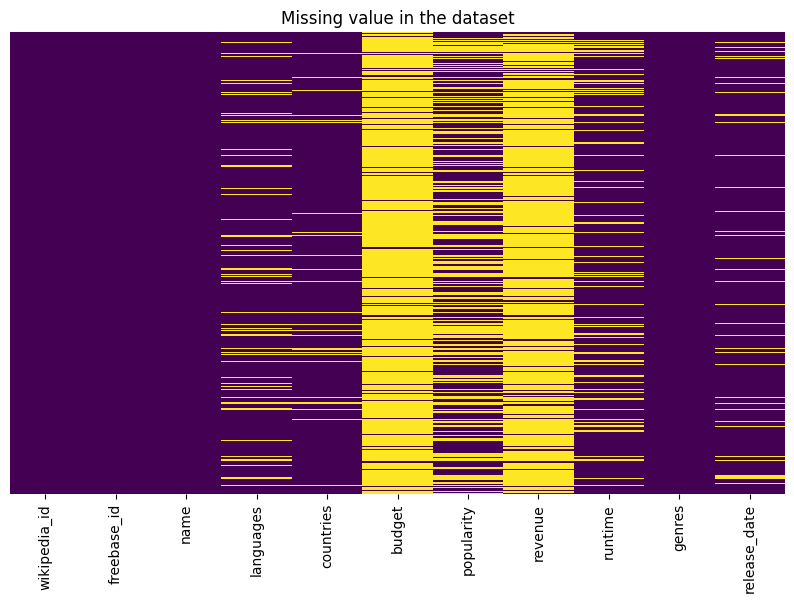

In [8]:
plot_missing_values(movies_df)

In [9]:
movies_df = feature_engineering_movies(movies_df)
number_categories(movies_df)

Number of genres: 21
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 'Historical', 'Horror', 'Musical', 'Mystery', 'Other', 'Romance', 'Science Fiction', 'Superhero', 'Thriller', 'War', 'Western']


### **General Information About our Dataset**

Features in our cleaned dataset:

*   **wikipedia_id** - A unique identifier for the movie's Wikipedia page
*   **freebase_id** - A unique identifier used by Freebase
*   **name** - The title of the movie
*   **languages** - A list of languages spoken in the movie
*   **countries** - The list of countries where the movie was produced or released
*   **budget** - The total production cost of the movie
*   **popularity** -  A numeric value indicating the movie's popularity from TMDB website
*   **revenue** - The total amount of money the movie earned from all sources
*   **runtime** - The total length of the movie in minutes
*   **genre** - The categories or types of the movie
*   **release_date** - The official date when the movie was released





 From which country do most movies come from?

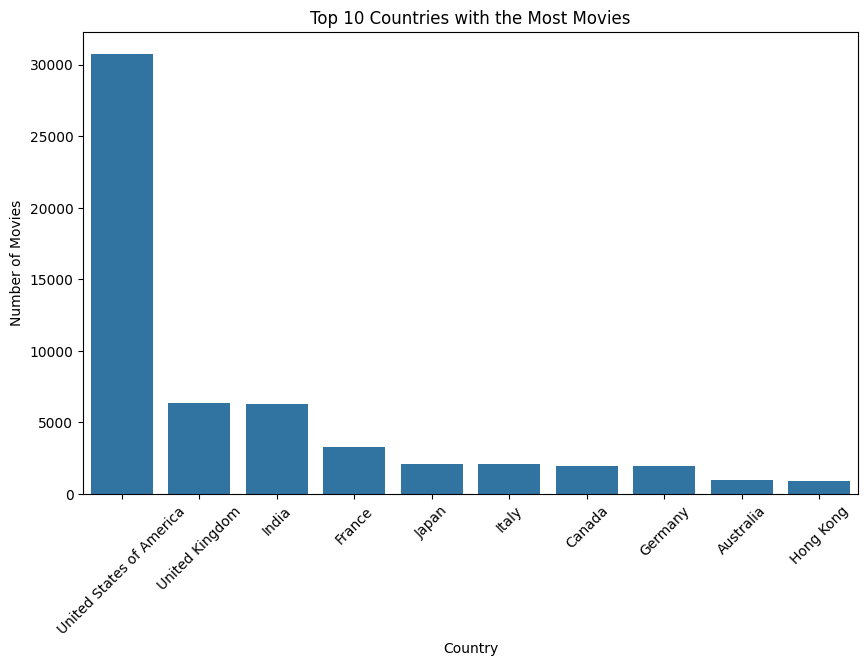

In [10]:
plot_top_10_countries(movies_df)

Let's also visualize most popular languages!

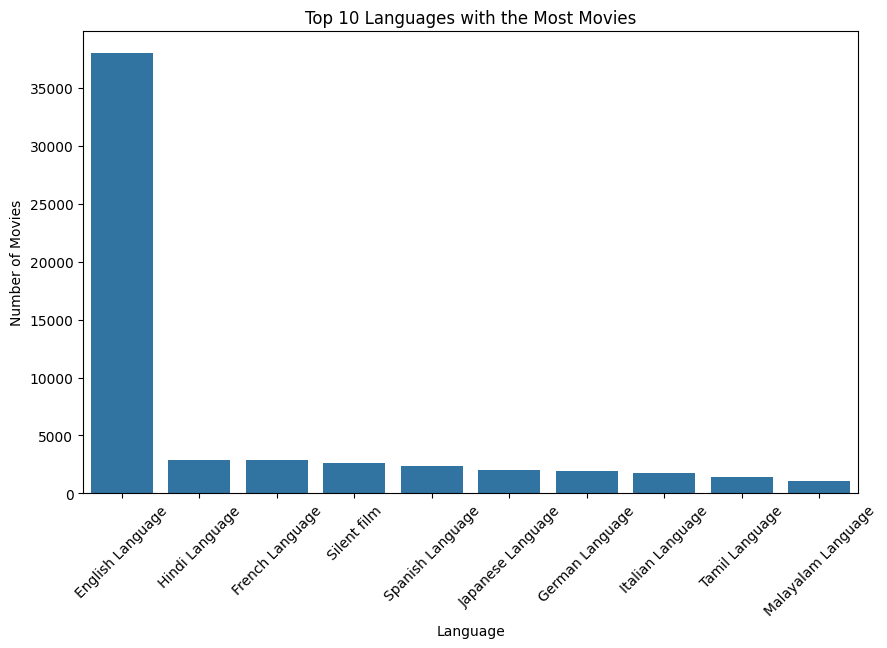

In [11]:
plot_popular_languages(movies_df)

 We can also check the budgets of movies in our dataset:

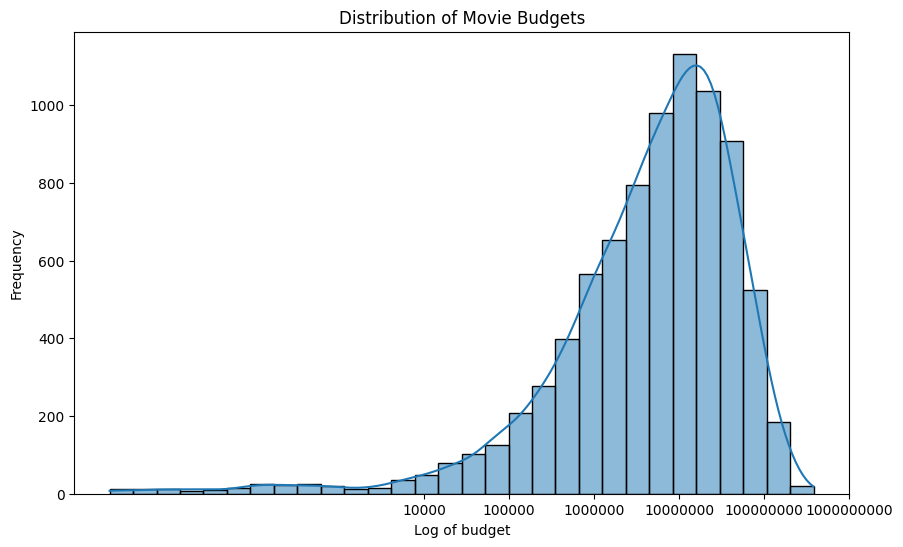

In [12]:
plot_log_scale_budget_distribution(movies_df)

 It is also very useful to know distribution of revenues:

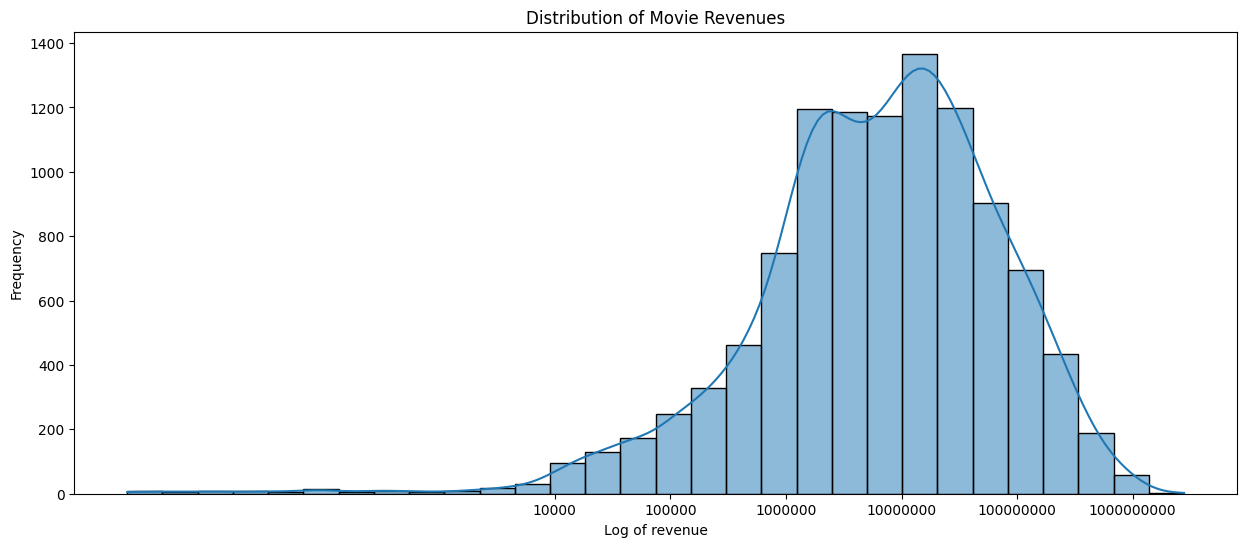

In [13]:
plot_revenue_distribution(movies_df)

 As well as distribution of movies through years:

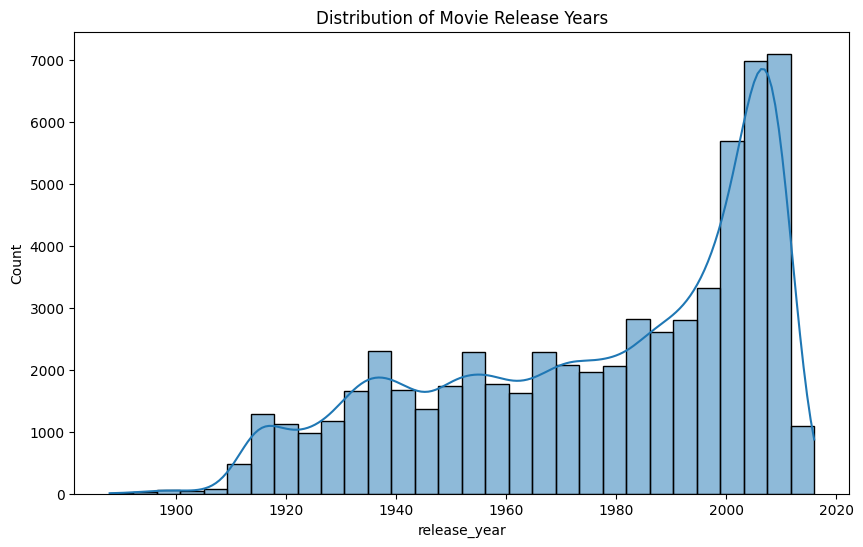

In [14]:
plot_movies_over_years(movies_df)

Let's see what are the most popular genres!

10 Most Popular Genres:
Drama: 27374
Comedy: 14504
Action: 8497
Thriller: 7603
Other: 6074
Horror: 4157
Adventure: 4131
Family: 4074
Documentary: 3833
Musical: 3363


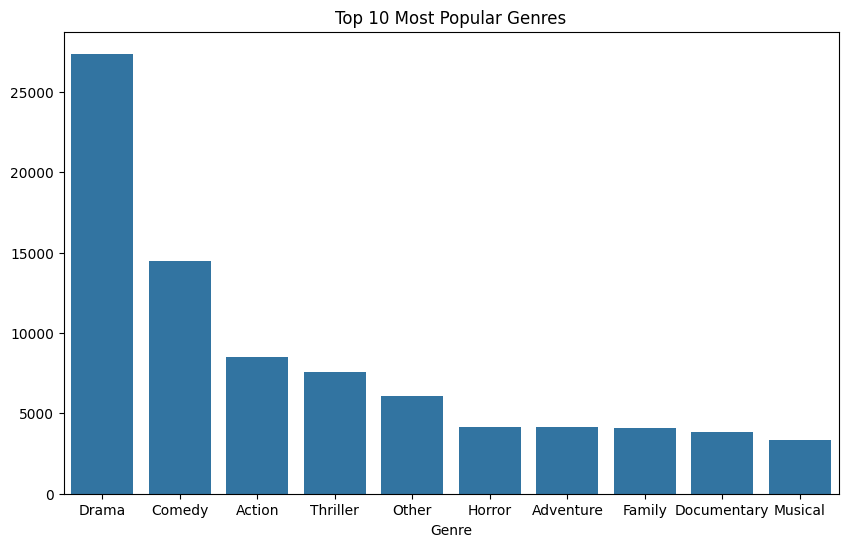

In [15]:
plot_top_10_genres(movies_df)

Popularity score is also useful, so we should show it:

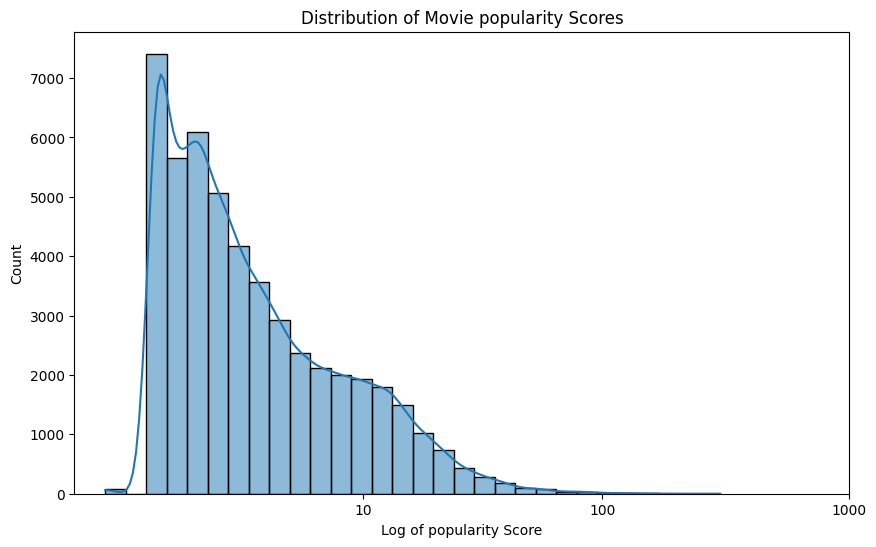

In [16]:
plot_popularity(movies_df)

### **Historical Influence on Film Genres and Themes**

#### Identifying periods in history that can have an effect in genres

For this part in our work, we try and find out if there exists a relationship between important historic periods and the genre of movies, starting off with World War I and World War II


We first plotted the amount of movies per genre in 3 different periods, WW1, WW2 and the period between wars

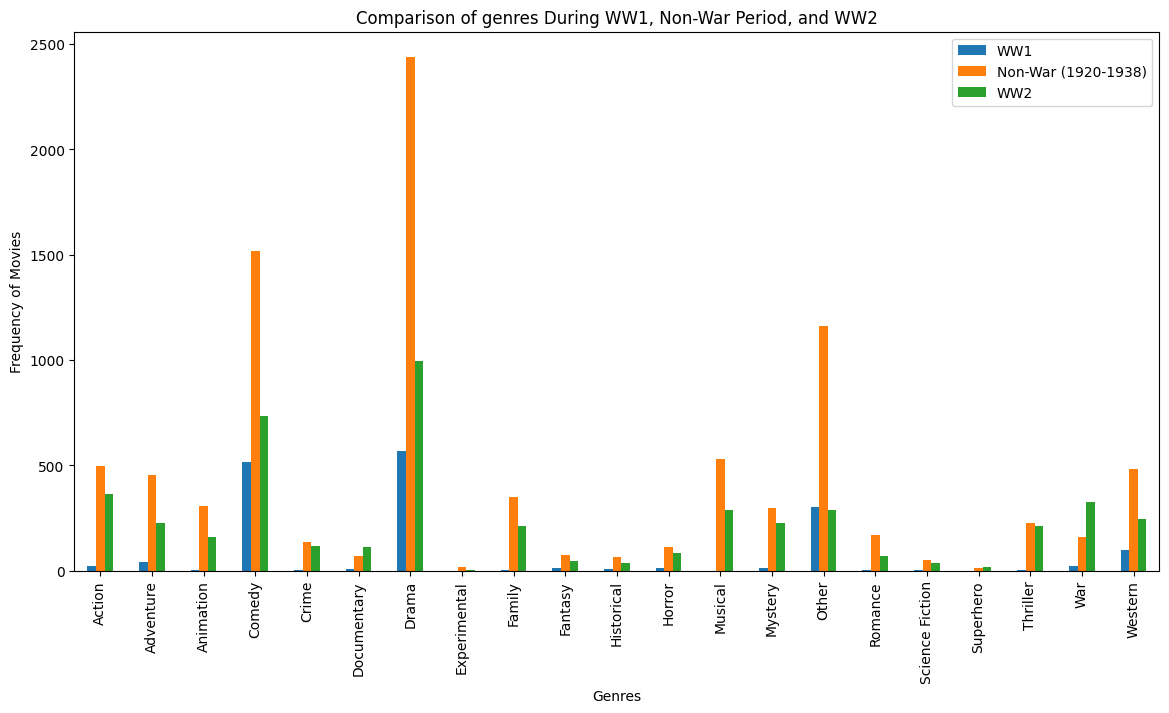

In [17]:
comparison_genres_war_periods(movies_df)

To have a better understanding of the flux of each movie genre in the different periods, we plotted its relative percentage to all the genres.

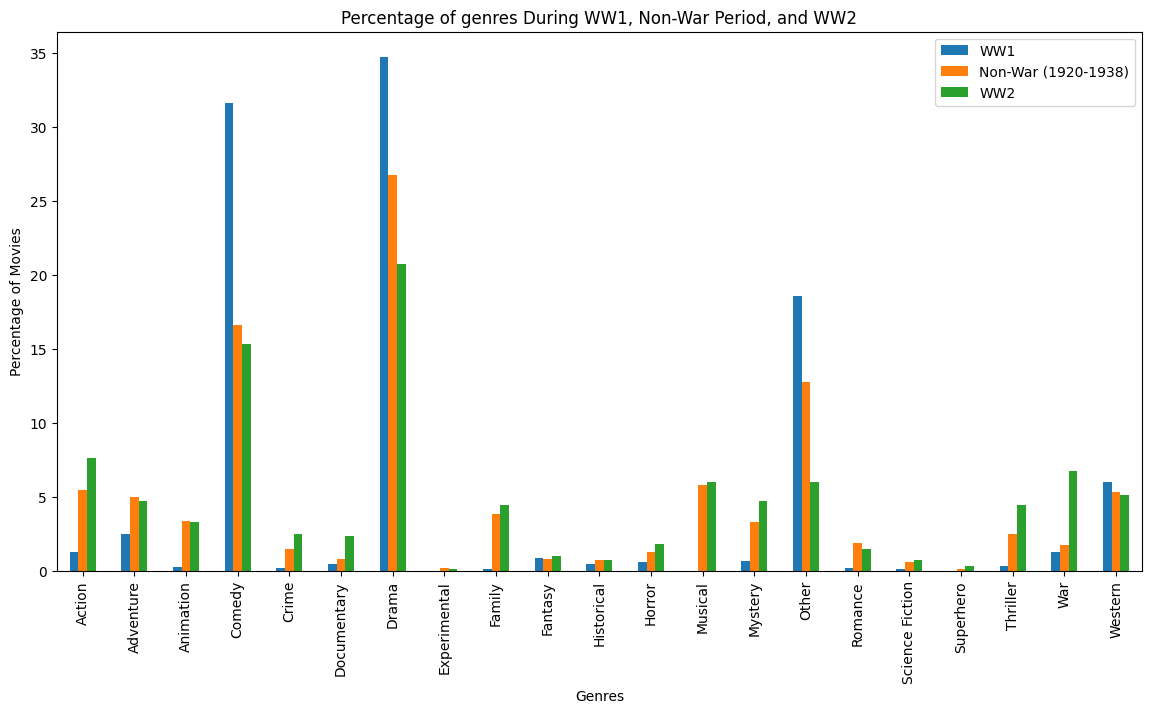

In [18]:
percentage_genres_war_periods(movies_df)

Because of a possible bias in the period of Non-War, we also plotted with respect to all the movies of our dataset.

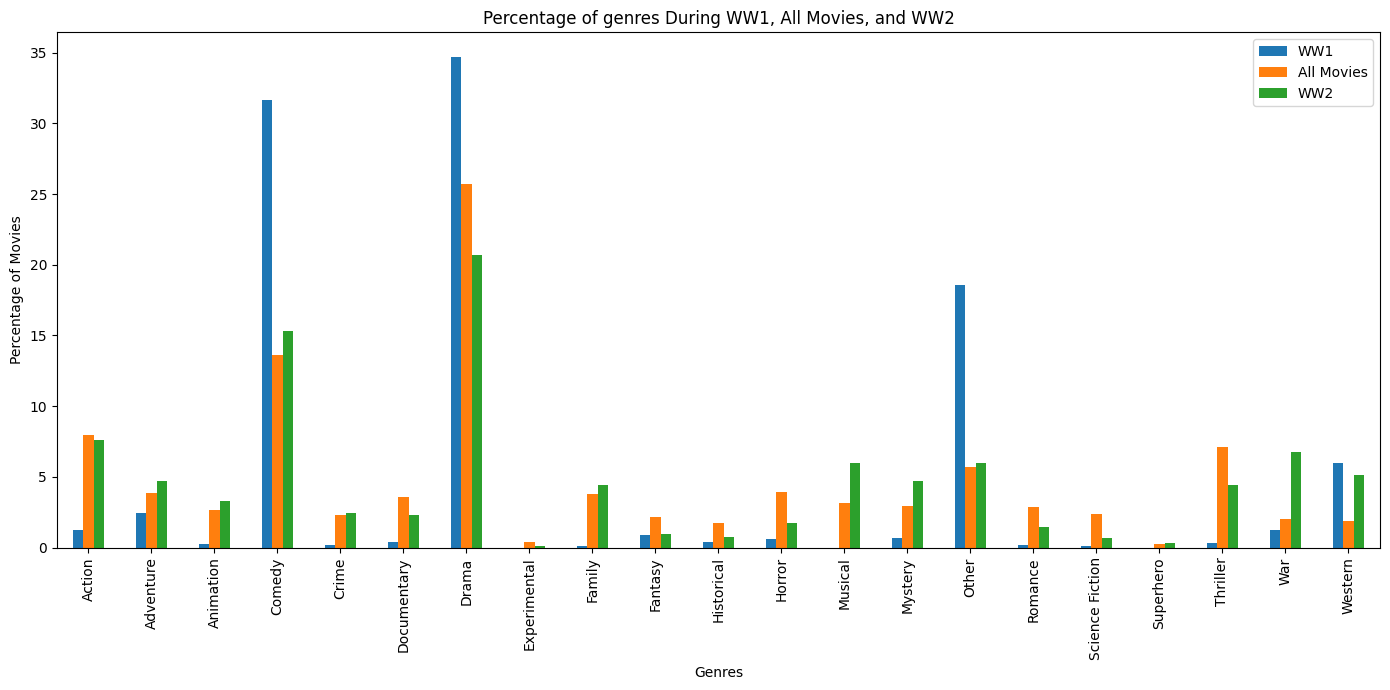

In [19]:
percentage_genres_war_periods_all_movies(movies_df)

We now proceeded to make a similar analysis but instead of using bars to plot the different genres, we plotted all of them over eachother in a plot with an x axis representing the years and the y axis the relative percentage of each movie genre.

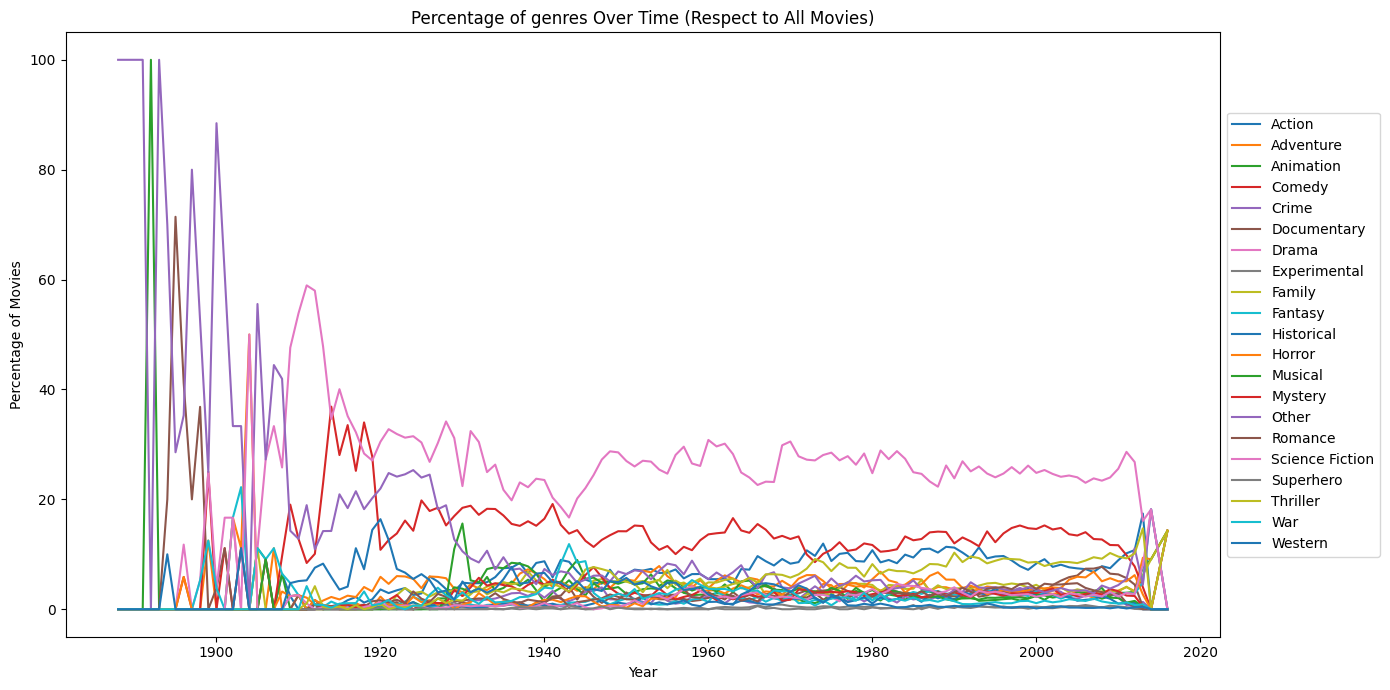

In [20]:
genres_over_time(movies_df)

From the plots we generated we could see there is some noise in the first years of our data set, and because of it it will be difficult to observe a trend or a pattern in WW1 for example. To further prove this point we will go into a deeper analysis.

First we wanted to know the number of movies per year, especially for the older dates.

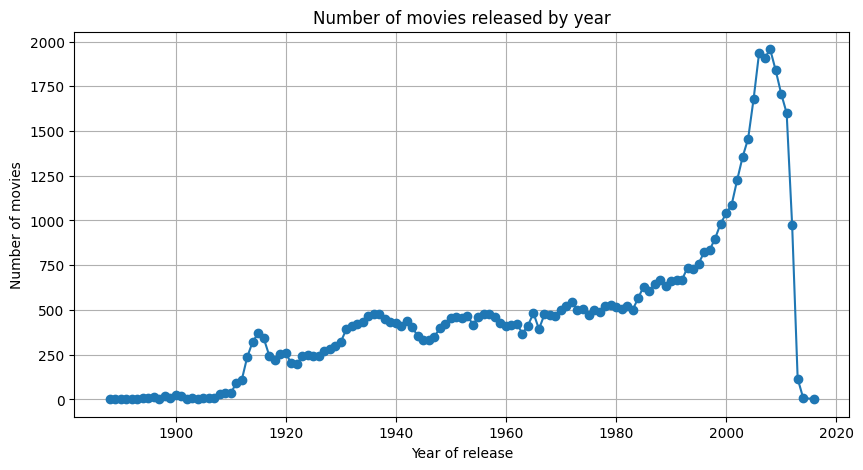

In [21]:
number_movies(movies_df)

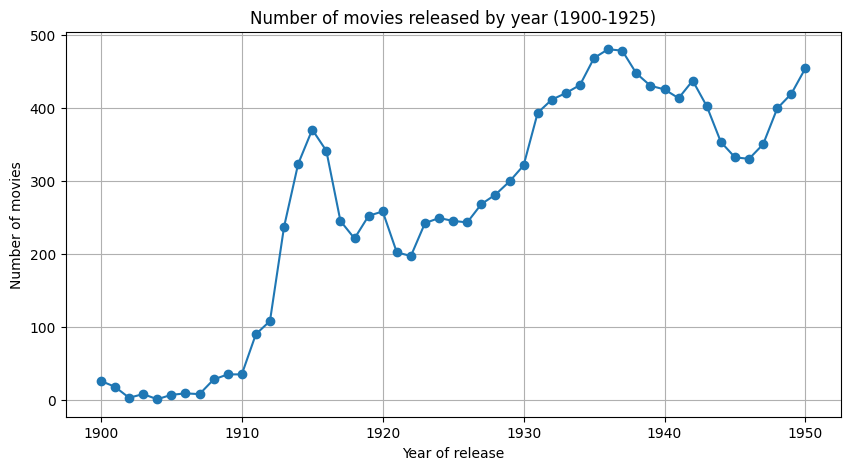

In [22]:
number_movies_1900_1925(movies_df)

In [23]:
number_movies_war(movies_df)

Number of movies from 1914 to 1919: 1500
Number of movies from 1939 to 1945: 2792


We can see that the amount of movies in our data set for the second world war is aproximately double the amount for the first world war. And with this information we decided to focus on WW2 instead of both.

<Figure size 1400x700 with 0 Axes>

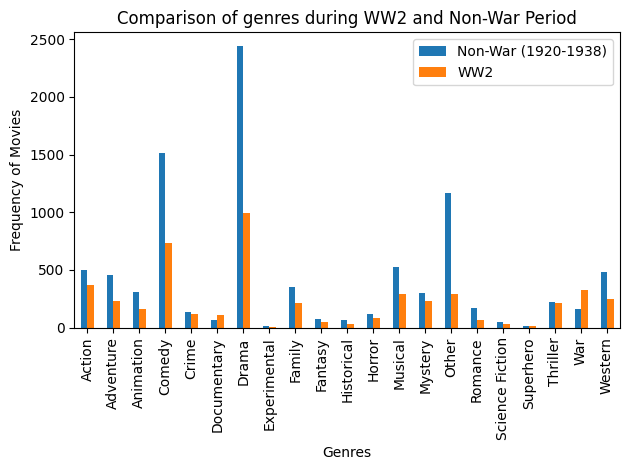

<Figure size 1400x700 with 0 Axes>

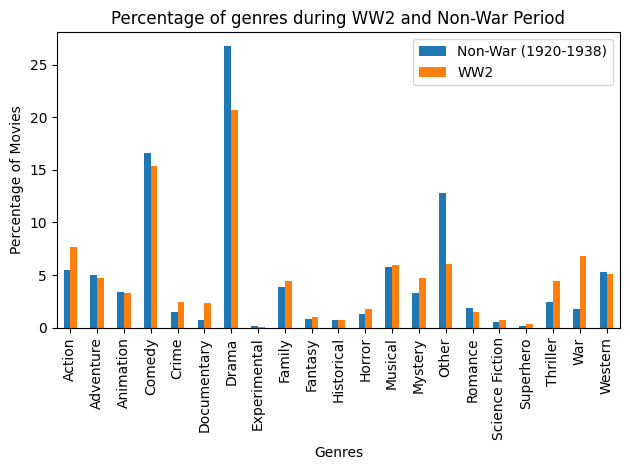

<Figure size 1400x700 with 0 Axes>

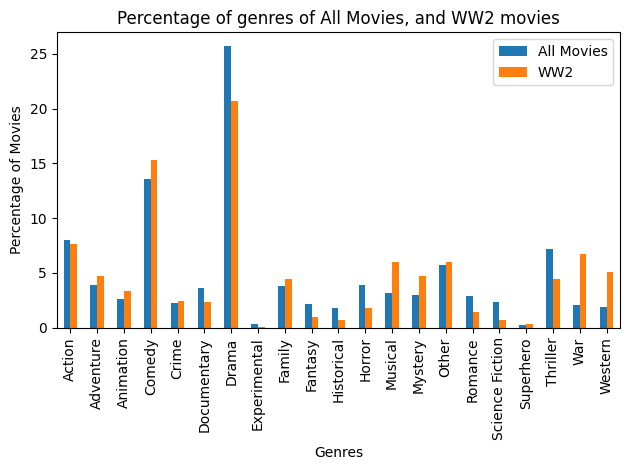

In [24]:
genre_comparison_war_period(movies_df)

From the bar plot we could see were interested to dive deeper in the genres of: War, Crime, Action, Mystery and Documentary.

We left the period for WW1 marked to prove that we couldn't prove anything because of the lack of information.

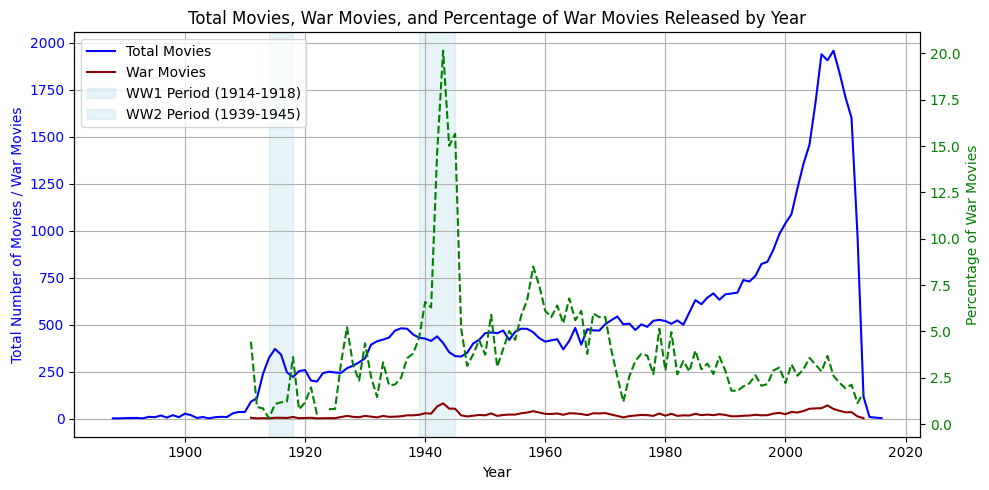

In [25]:
war_movies_timeline(movies_df)

In [26]:
war_movies_info(movies_df)

Percentage of War Movies in the Entire Dataset: 3.57%
Percentage of War Movies During WW1 (1914-1918): 1.33%
Percentage of War Movies During WW2 (1939-1945): 11.60%
Percentage of War Movies During Non-War Period (1920-1938): 2.51%


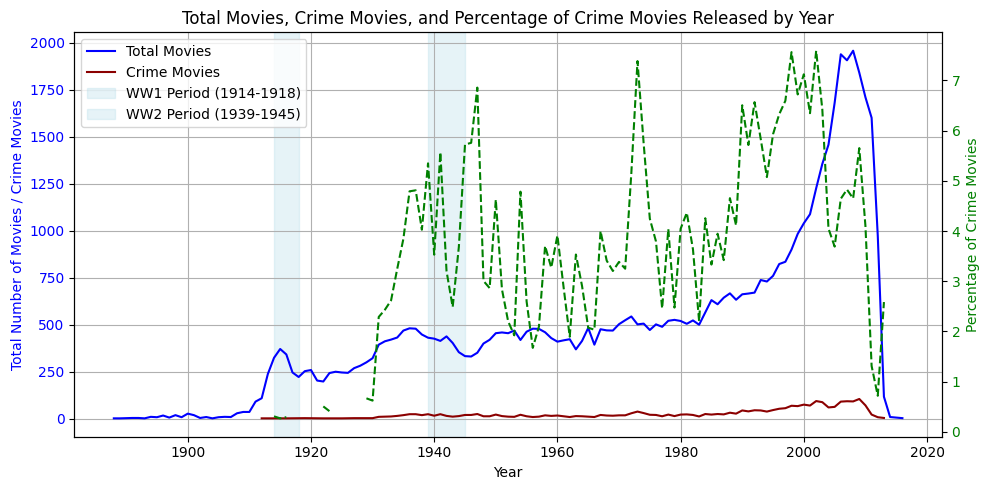

In [27]:
crime_movies_timeline(movies_df)

In [28]:
crime_movies_info(movies_df)

Percentage of Crime Movies in the Entire Dataset: 4.03%
Percentage of Crime Movies During WW1 (1914-1918): 0.20%
Percentage of Crime Movies During WW2 (1939-1945): 4.19%
Percentage of Crime Movies During Non-War Period (1920-1938): 2.13%


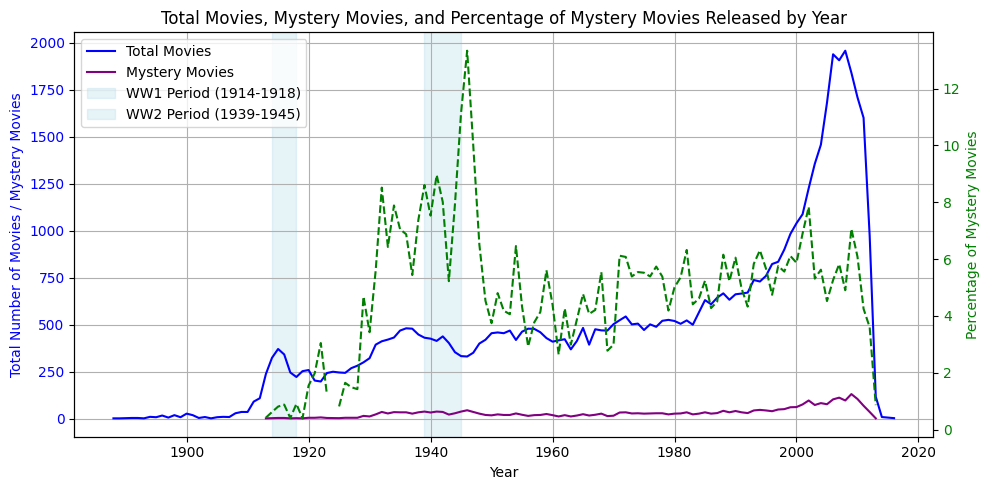

In [29]:
mystery_movies_timeline(movies_df)

In [30]:
mystery_movies_info(movies_df)

Percentage of Mystery Movies in the Entire Dataset: 5.19%
Percentage of Mystery Movies During WW1 (1914-1918): 0.73%
Percentage of Mystery Movies During WW2 (1939-1945): 8.13%
Percentage of Mystery Movies During Non-War Period (1920-1938): 4.72%


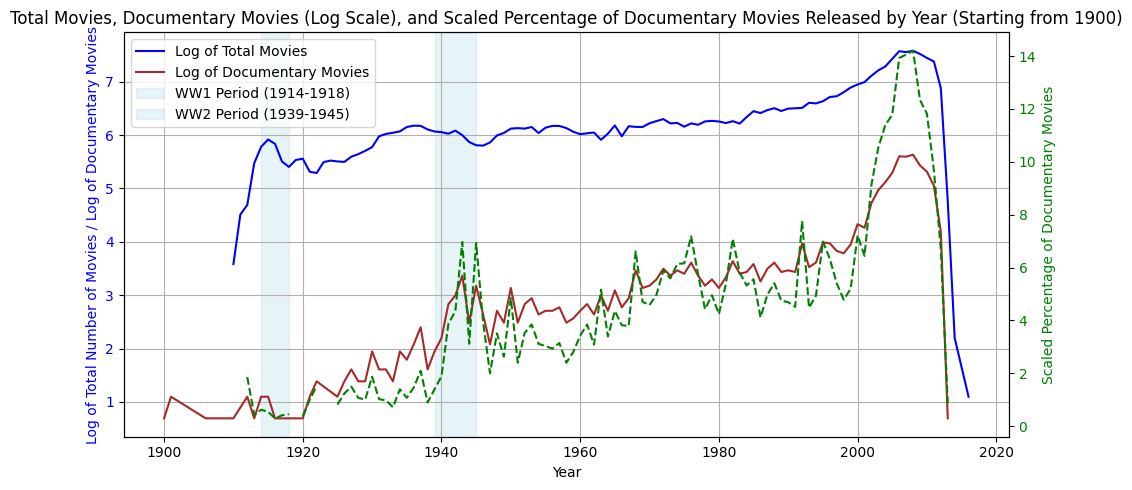

In [31]:
documentary_movies_timeline(movies_df)

For this plot we applied log scaling to emphazise on the brief documentary increase during WW2

In [32]:
documentary_movies_info(movies_df)

Percentage of Documentary Movies in the Entire Dataset: 6.34%
Percentage of Documentary Movies During WW1 (1914-1918): 0.47%
Percentage of Documentary Movies During WW2 (1939-1945): 3.98%
Percentage of Documentary Movies During Non-War Period (1920-1938): 1.11%


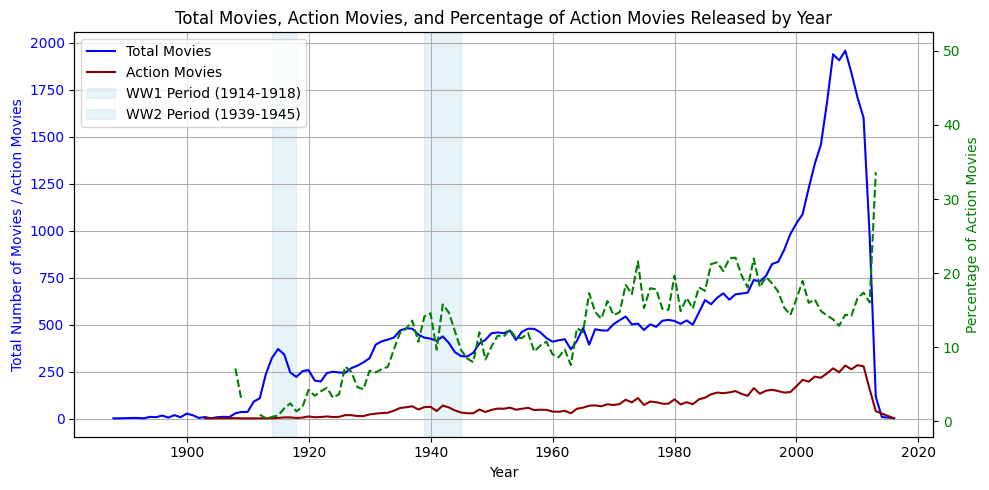

In [33]:
action_movies_timeline(movies_df)

In [34]:
action_movies_info(movies_df)

Percentage of Action Movies in the Entire Dataset: 14.06%
Percentage of Action Movies During WW1 (1914-1918): 1.33%
Percentage of Action Movies During WW2 (1939-1945): 13.11%
Percentage of Action Movies During Non-War Period (1920-1938): 7.82%


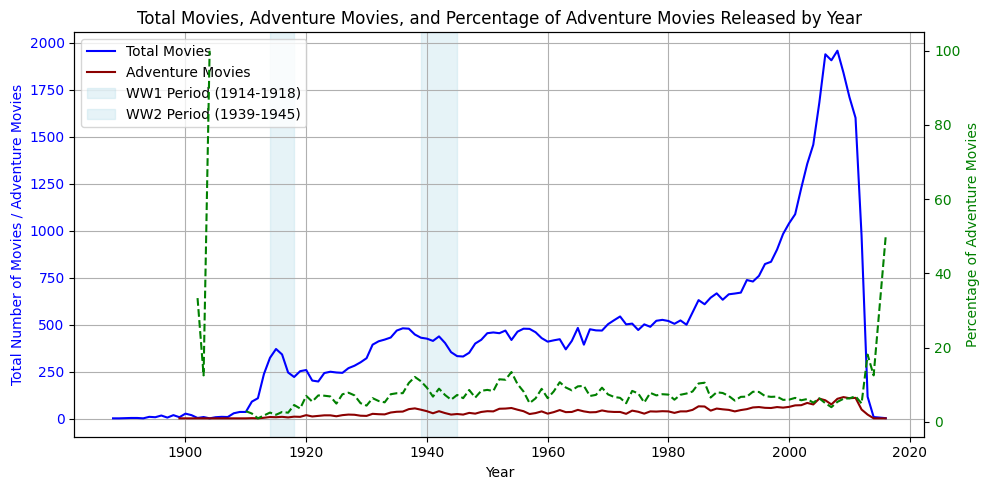

In [35]:
adventure_movies_timeline(movies_df)

In [36]:
adventure_movies_info(movies_df)

Percentage of Adventure Movies in the Entire Dataset: 6.83%
Percentage of Adventure Movies During WW1 (1914-1918): 2.67%
Percentage of Adventure Movies During WW2 (1939-1945): 8.13%
Percentage of Adventure Movies During Non-War Period (1920-1938): 7.20%


To complement our analysis we divided our previous research into countries that were involved in war and weren't.

We also took into account the number of movies for each country and seeing the United States has a considerable amount of advantage, we will be focusing mainly in the United States.

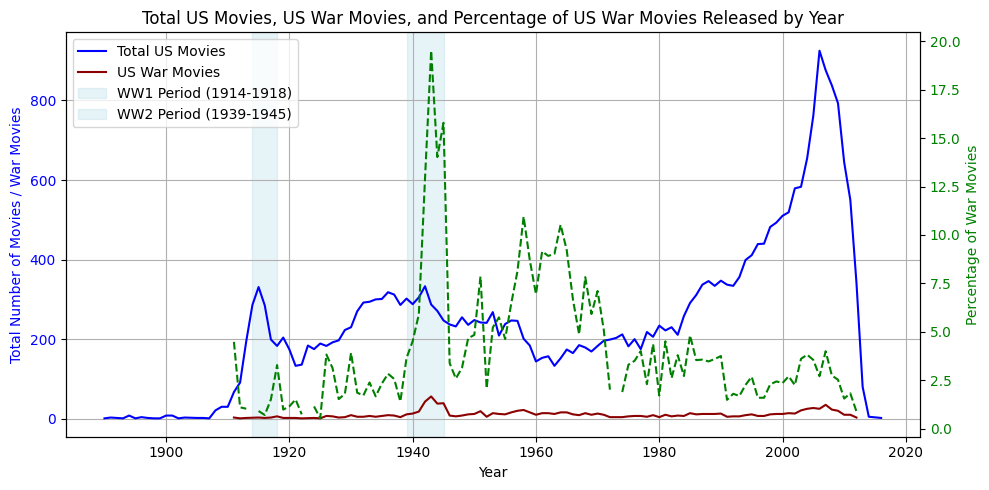

In [37]:
us_movies_war(movies_df)

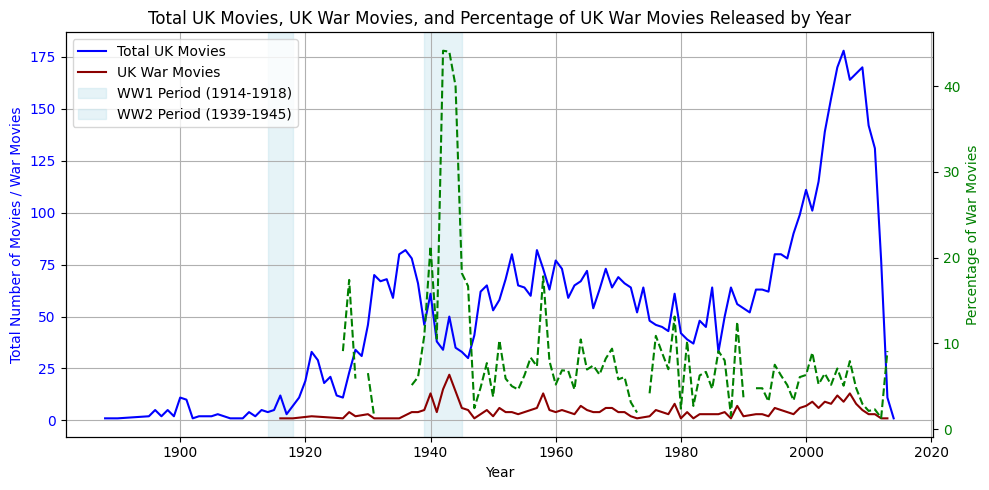

In [38]:
uk_movies_war(movies_df)

Because germany went by different names, we wanted to see if there were more names for germany in our dataset we obtained all the unique names for countries in our dataset and asked chatgpt to list us all the ones that related to germany.

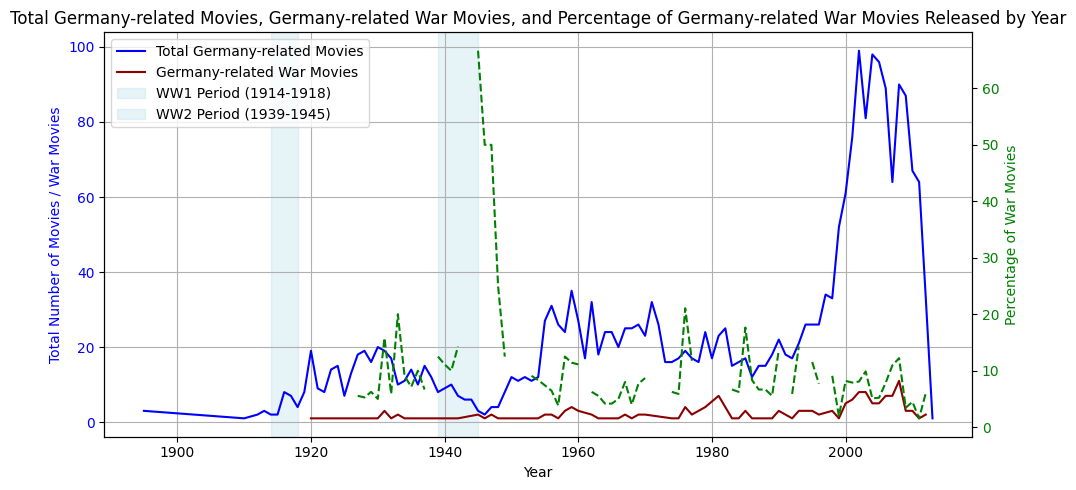

In [39]:
germany_movies_war(movies_df)

We can clearly see that the second world war was the period were war movies had the biggest percentages, and it becomes clearer for countries directly involved in war, but now we will use the example of India who has a large amount of data but wasn't directly involved in the war.

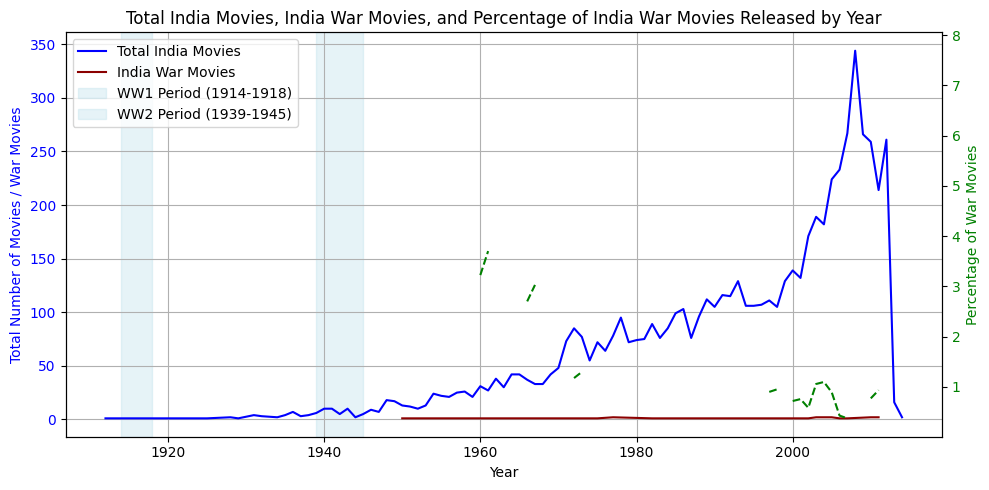

In [40]:
indian_movies_war(movies_df)

Although the number of movies is considerably low, India over the whole dataset has rarely a war movie.

The next event we analyzed is the Space Race during the cold war, especially its influence in Sci-Fi movies  

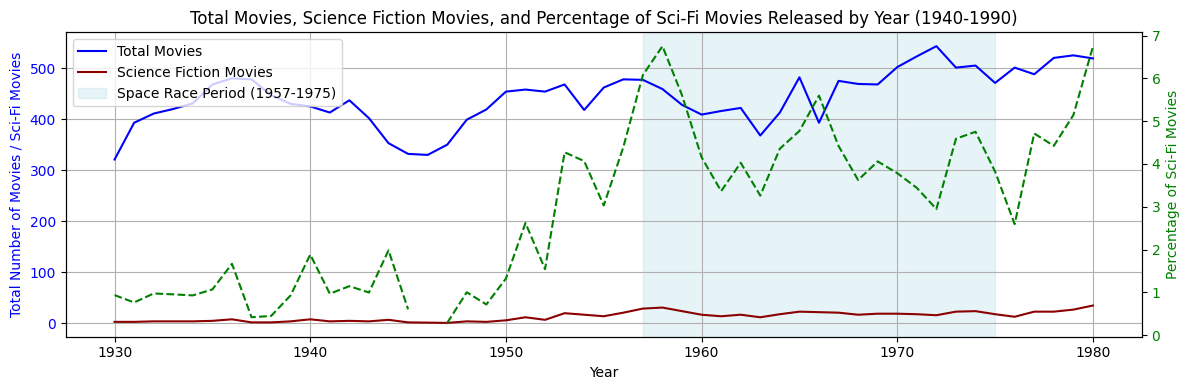

In [41]:
science_fiction_movie(movies_df)

In the plot we can observe, how the percentage of sci-fi movie rises with the start of the Space Race and it maintains the following years.

Because the main participants of this event were United States and the Soviet Union, we also proceeded to analyze it by country to see if it was even clearer.

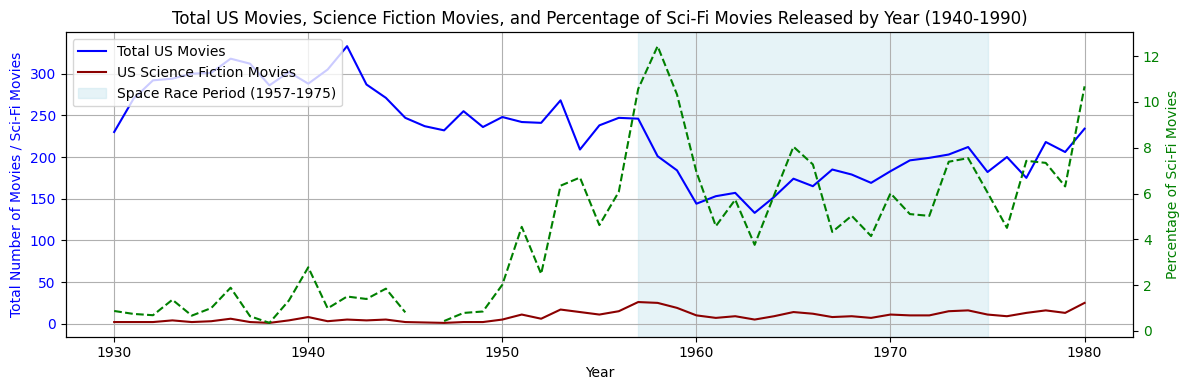

In [42]:
us_scinece_fiction(movies_df)

We did the same as with Germany, we asked chat gpt for all the countries that belonged to the soviet union or names that the SSR could have had, but seeing that there is a very little amount of movies from the SSR in our dataset, we didn't move along with the analysis.

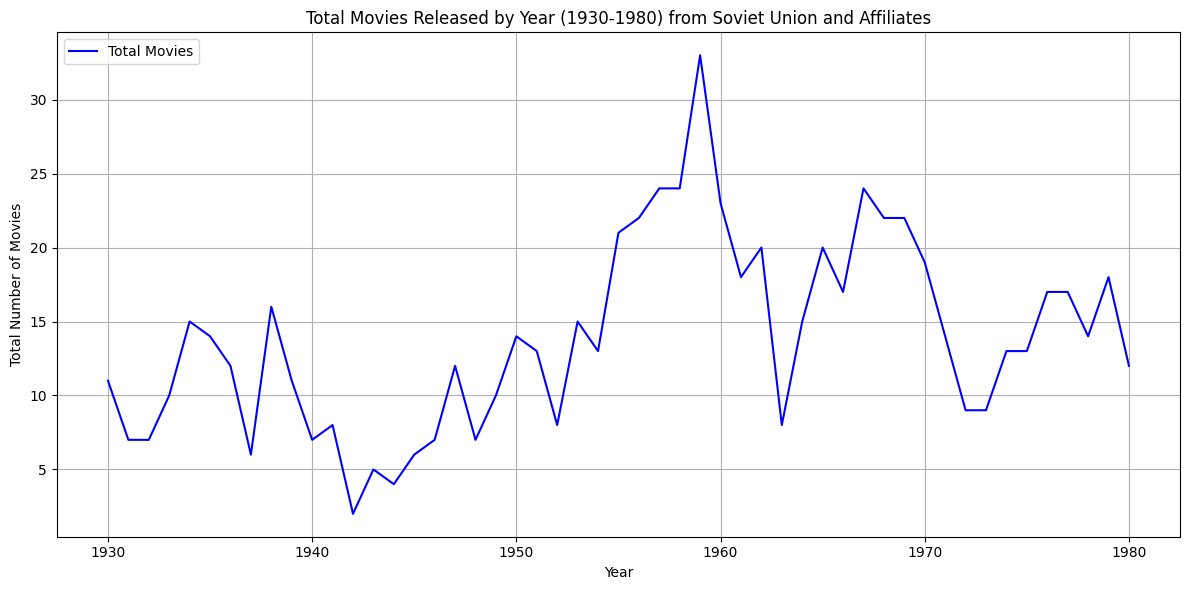

In [43]:
soviet_union_movies_1930_1980(movies_df)

For the next analysis we decided to use 9/11 since we all now movies and documentaries based from the terrorist attack. And we focused mainly on documentaries.

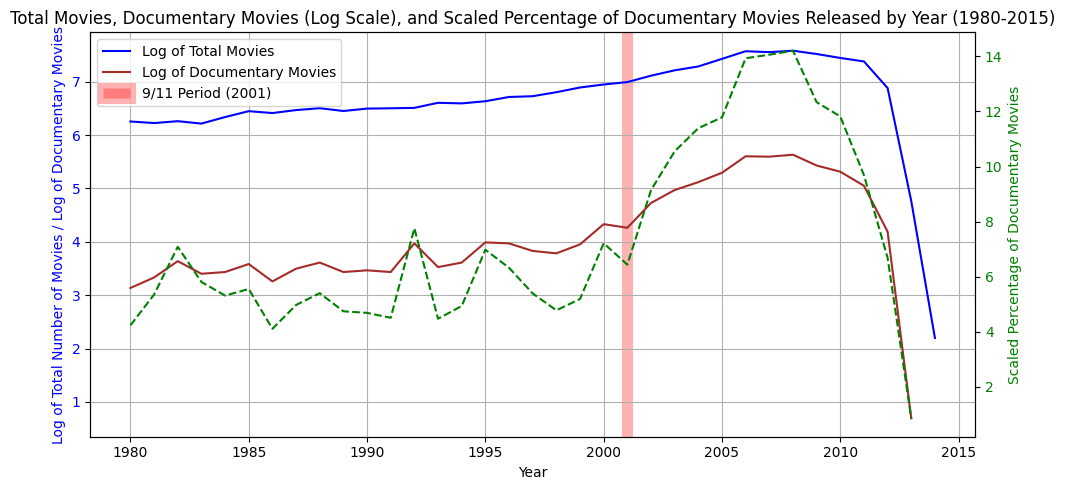

In [44]:
documentary_movies_1980_2015(movies_df)

We can effectively see that after 911, documentaries experienced a very noticeable increase in percentage in both the world and in the United States, we can also see that the plot has the same behaviour but if we see closely the percentage amount in the United States is considerably larger than in the world, it goes up to around 40% where in the world around 28% in its peak.

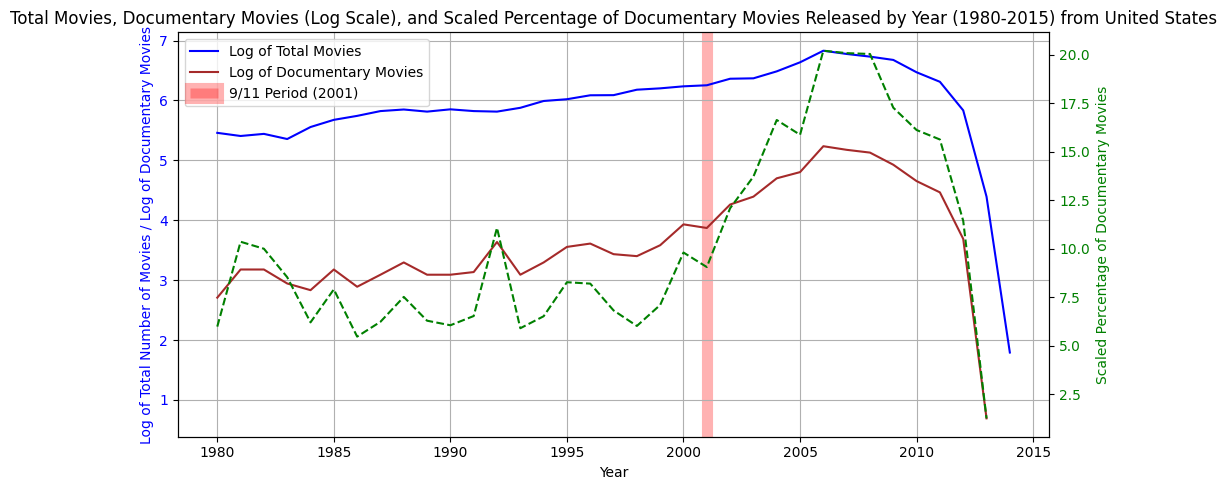

In [45]:
documentary_movies_1980_2015_us(movies_df)

#### Correlation

Correlation between WW2 war movies and war movies over the years

In [46]:
ww2_correlation(movies_df)

Correlation between WWII period and percentage of war movies produced: 0.7024991381584714


Correlation between WW2 war movies and war movies over the years in the United States

In [47]:
ww1_correlation_us(movies_df)

Correlation between WWII period and percentage of War movies produced in the United States: 0.5584222263012544


In [48]:
ww2_correlation_uk(movies_df)

Correlation between WWII period and percentage of War movies produced in the United Kigdom: 0.7311648033056813


In [49]:
ww2_correlation_mystery(movies_df)

Correlation between WWII period and percentage of Mystery movies produced: 0.6140586117894011


In [50]:
ww2_correlation_documentary(movies_df)

Correlation between WWII period and percentage of Documentary movies produced (1910-1960): 0.5005559373827958


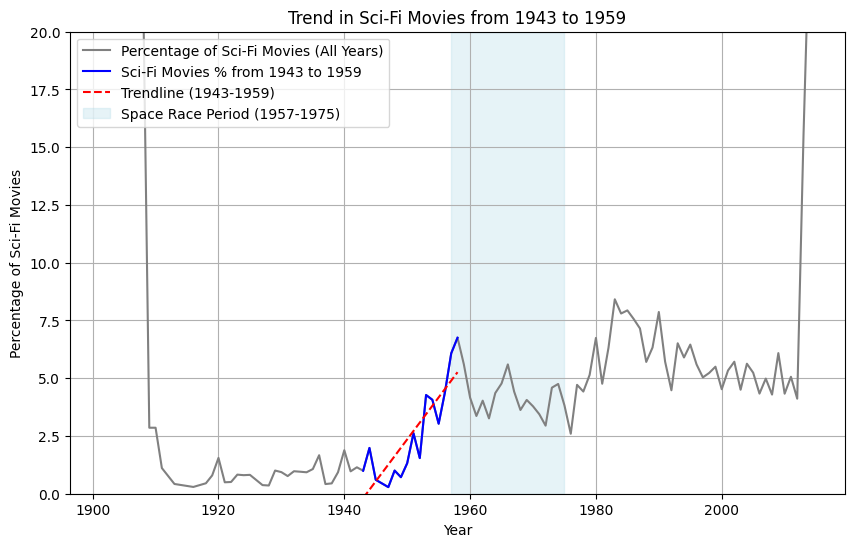

Slope from 1943 to 1959: 0.36339749046068887


In [51]:
sci_fi_1943_1959(movies_df)

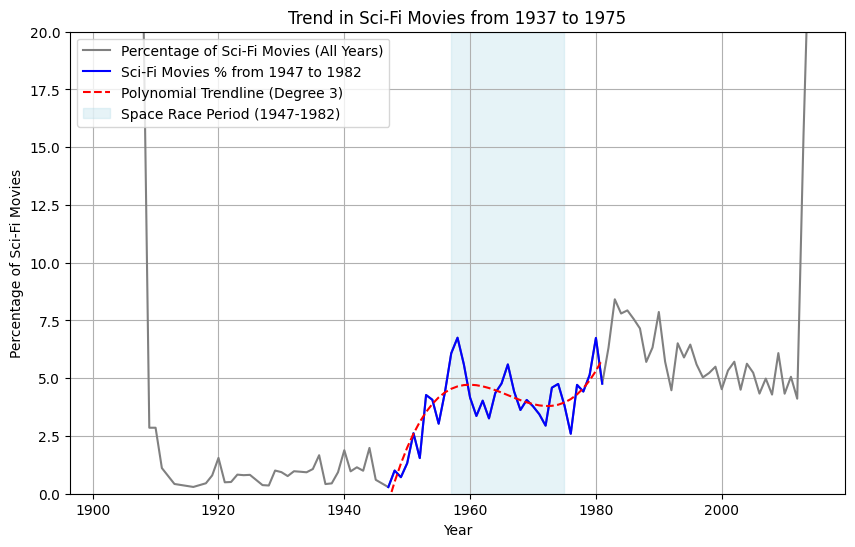

Polynomial Function: f(x) = -7395189.624 + 11284.307*x^1 + -5.740*x^2 + 0.001*x^3


In [52]:
sci_fi_1937_1975(movies_df)

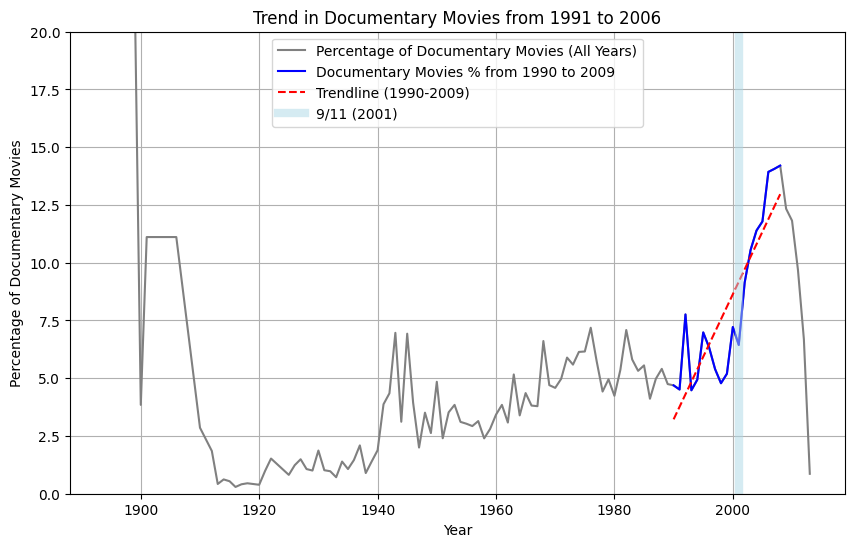

Slope from 1990 to 2009: 0.541423904984078


In [53]:
documentary_1991_2006_linear(movies_df)

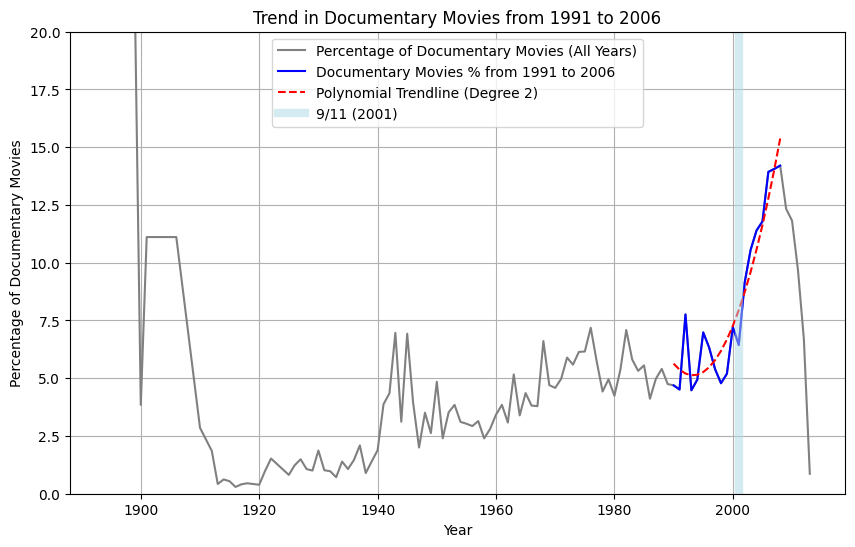

Polynomial Function: f(x) = 187818.534 + -188.447*x^1 + 0.047*x^2


In [54]:
documentary_1991_2006_polynomial(movies_df)

### **Seasonal Patterns in Movies**

In [55]:
df_movies = getdf_filtered(movies_df)

We would now like to start analyzing movies based on the season - summer, autumn, winter and spring.
Since our analysis is based on season for now, we are going to make a dataset that contains only movies which have month/year and day/month/year release_date formats.

In [56]:
df_seasons = date_pattern(df_movies)

Number of movies that have at least month and a year: 57566
Number of movies that have any date (but not NaN): 60447
Number of movies that have day, month and a year: 57566


Cool! Now we have to divide them in seasons.

How to divide those that have only month and year? Since we can't really divide the movies that only have a month (we can drop them, that's an option), we are going to divide the seasons like groups of 3 months each. When we divide them this way, we get the next numbers of movies through seasons:

In [57]:
seasonal_analysis(df_seasons)

Movies released in summer: 12254
Movies released in autumn: 15948
Movies released in winter: 15563
Movies released in spring: 13801


Let's also look at the histogram of this distribution:

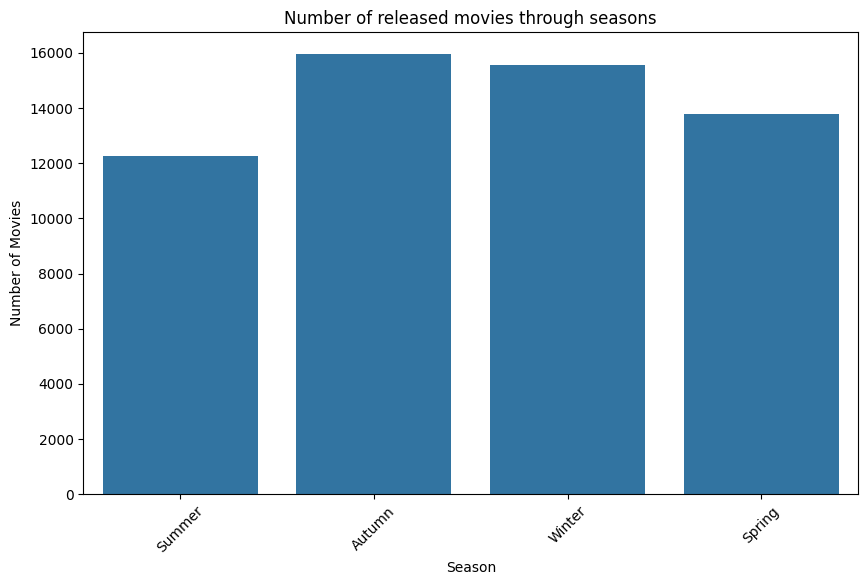

In [58]:
plot_seasons(df_seasons)

Do movies in each season tend to have a different revenue? Popularity? Budget? Maybe even runtime? What about genre, does certain genre get more released in certain season?
These are all questions we want to find answers for.

We will start with revenue!

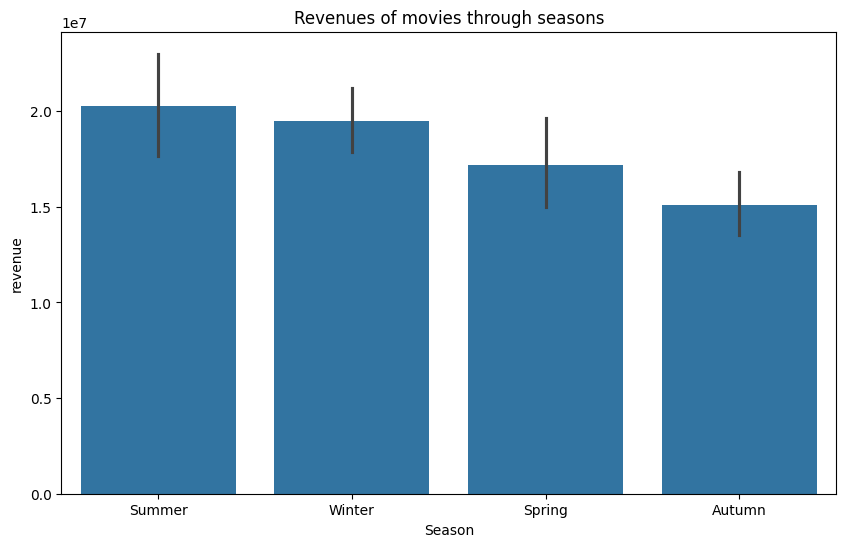

In [59]:
plot_seasons_revenues(df_seasons)

Does seasonal revenue change over time?

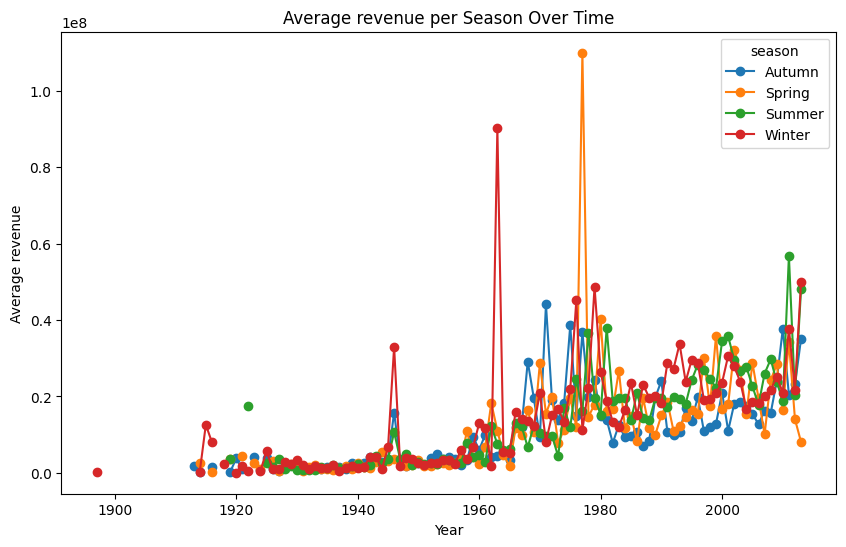

In [60]:
plot_seasonal_revenue(df_seasons)

So, movies released in summer tend to have the biggest revenue... Why is that? Are they maybe blockbusters? Is it because people tend to have more free time during summer? Let's see how does budget look for different seasons.

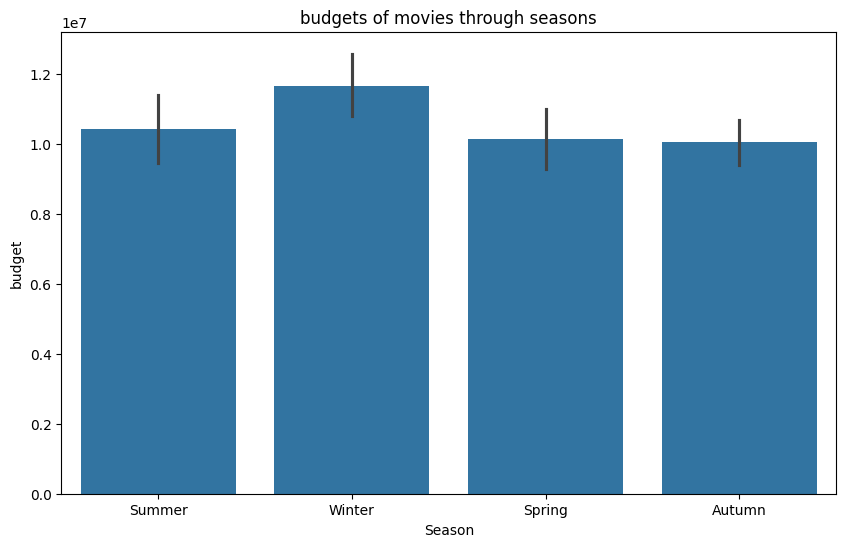

In [61]:
plot_seasons_budgets(df_seasons)

If we were thinking about blockbusters, it would make sense they would have the biggest budgets. What about runtime? It may not seem important, but maybe indie, short movies are popular in some seasons?

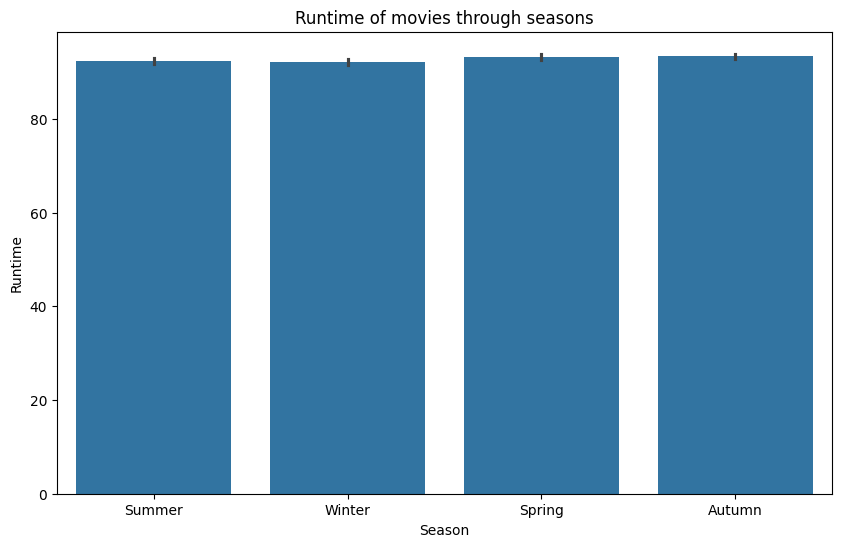

In [62]:
plot_seasons_runtime(df_seasons)

So, quite constant - around 90 minutes seems like a sweet spot. We should check out popularity too:

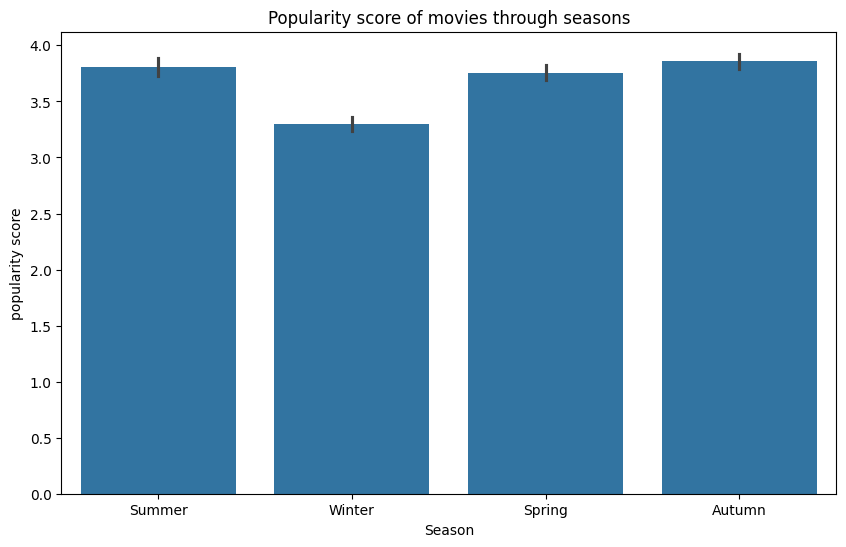

In [63]:
plot_seasons_popularity(df_seasons)

Interesting, maybe people do tend to like watching movies during summer... 

In the end, the most important part - we would love to know what are the most popular genres in each season!

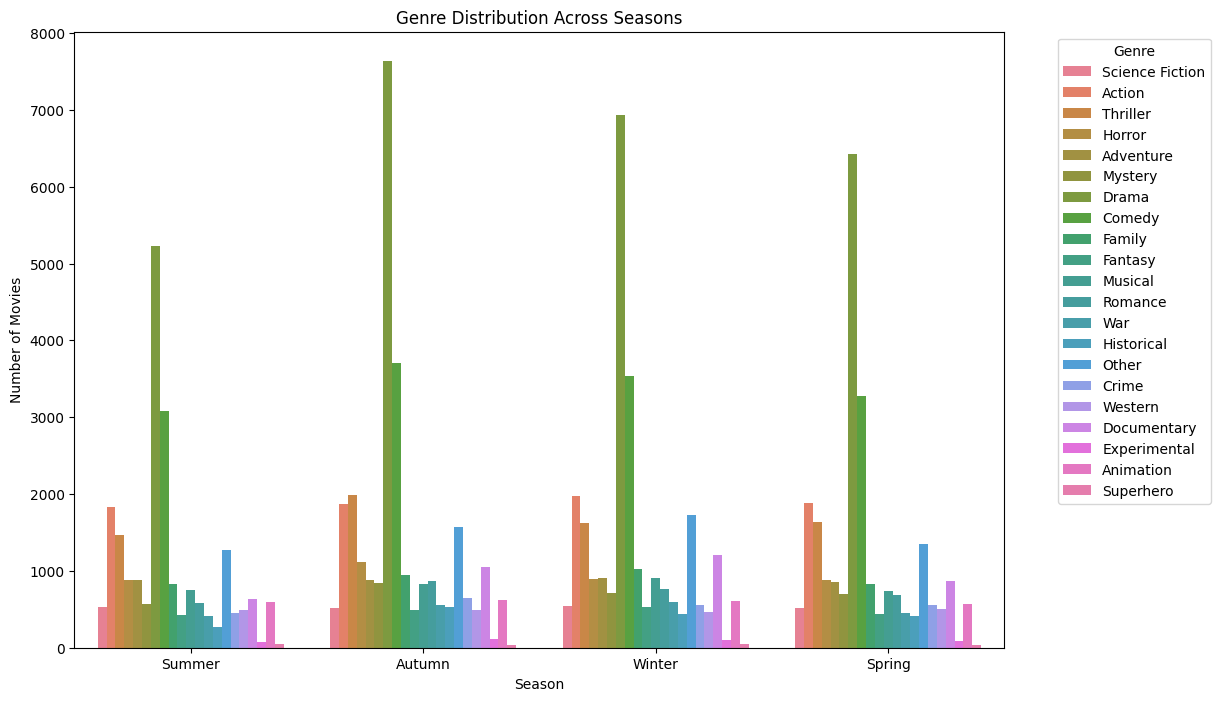

In [64]:
plot_genre_distribution(df_seasons)

Let's look at one more way to inspect this:

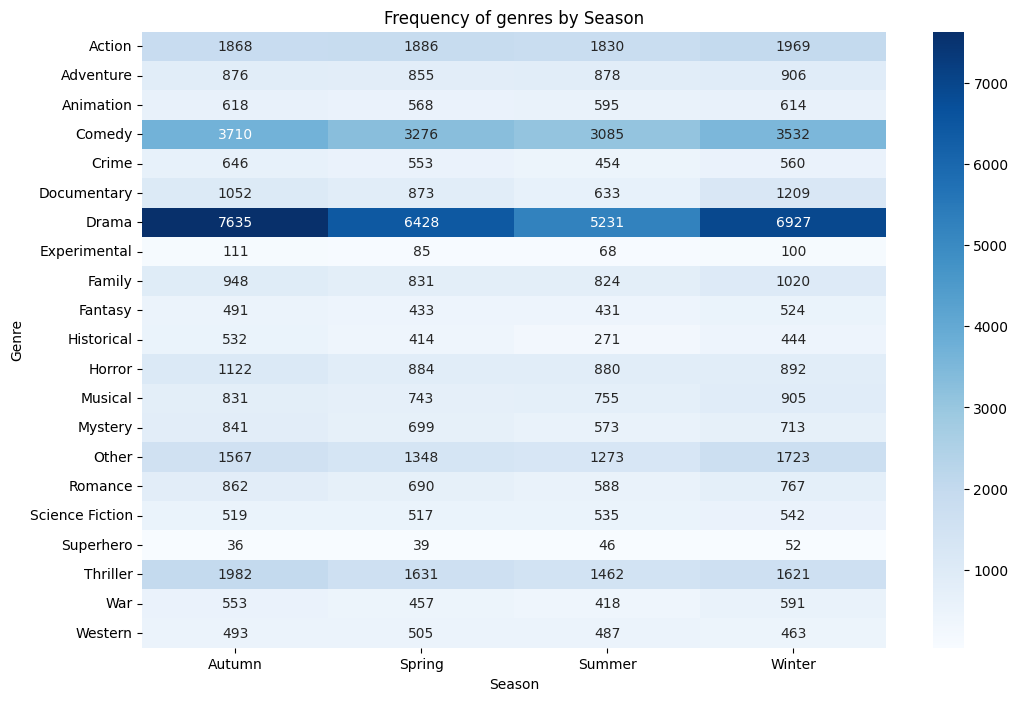

In [65]:
plot_genre_season_heatmap(df_seasons)

Let's also view season by season, to see better what genres are in which season popular:

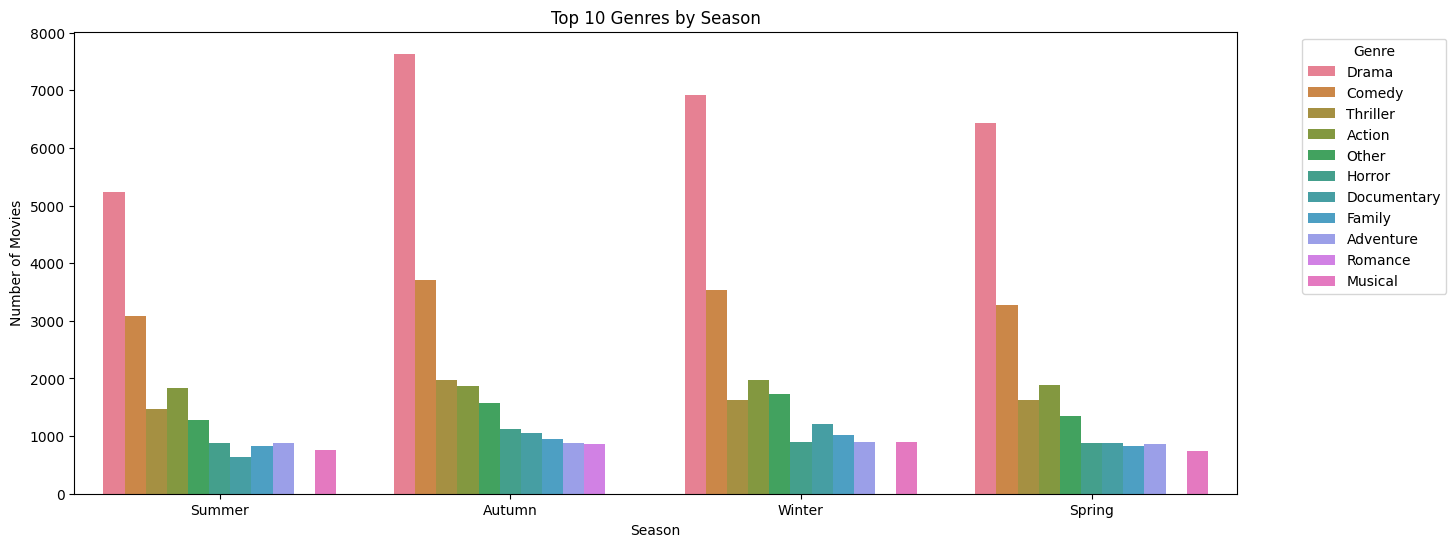

In [66]:
plot_top_genres_per_season(df_seasons)

We have seen on one of the previous boxplots that movies released in summer get more revenue, followed by movies released in winter. Is this a coincidence, or is there an actual pattern here? Let's test this!

Now that we looked at a lot of plots, let's actually ask some questions. Let's first start with the most obvious one, revenue - does the season in which movie is released in impact the revenue?

In [67]:
seasonal_regression_revenue(df_seasons)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.835
Date:                Wed, 11 Dec 2024   Prob (F-statistic):            0.00231
Time:                        22:31:59   Log-Likelihood:            -1.6244e+05
No. Observations:                8481   AIC:                         3.249e+05
Df Residuals:                    8477   BIC:                         3.249e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.508e+07   1

For this regression, we are going to use $5\%$ significance level.
The intercept value is $1.508\cdot10^7$ (or $~\$15.1$ million), so this is the baseline for revenue of movies released in reference season, which is autumn. For spring, the coefficient is $\beta_{spring}=2.078\cdot10^6$ ($~\$2$ million), which would mean that movies released in spring get $~\$2$ million more in revenue that those released in reference season, BUT, the p-value for spring is $p=0.166$, which is definitely bigger than $5\%$, which is our significance level, meaning that this coefficient isn't statistically significant. This implies that revenue of movies released in spring doesn't differ much from ones released in autumn. Next is summer, with coefficient of $\beta_{summer}=5.195\cdot10^6$ ($~\$5.2$ million), and p-value of $p=0.001$. The p-value is less than significance level, meaning that this is statistically significant. This implies that when holding other variables constant, movies released in summer do tend to have a bigger revenue by $~\$5.2$ million compared to those that are released in autumn. Finally, winter movies have coefficients  $\beta_{winter}=4.426\cdot10^6$ and p-value of $p=0.004$, again less than $5\%$, meaning this is statistically significant.
However, when we look at the R-squared value given by the ols model, it is onlt $R^2=0.002$, meaning that only $0.2\%$ of variance of revenue is explained by the season alone. This is quite low, so we can't really predict the movies revenue just based on the season. Other factors, like budget or runtime, likely play a big role in movies revenue.

In [68]:
seasonal_regression_popularity(df_seasons)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     57.32
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.65e-37
Time:                        22:31:59   Log-Likelihood:            -1.2918e+05
No. Observations:               46776   AIC:                         2.584e+05
Df Residuals:                   46772   BIC:                         2.584e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8595    

We also wanted to test how different seasons affect popularity score of the movies. Again, autumn is a reference season. We have a intercept of $3.8595$, which represents the average popularity score for movies released in autumn. For spring, we have a negative coefficient of $\beta_{spring} = -0.1056$, with p-value of $p=0.033$, so bigger than significance level (but this is not that big, we would reject the null hypothesis at $1\%$ significance level). This means that movies released in spring tend to have a slightly lower score than those released in autumn. For summer, we again have a negative coefficient, but now p-value is $p=0.327$, so we conclude that the difference is not statistically significant. Winter has also a negative coefficient of $\beta_{winter} = -0.5628$, with p-value being $p ~ 0$. This implies that movies released in winter to have a significantly lower popularity score average compared to those that are released in autumn.
Finally, we can look at $R^2=0.004$, which means that only $4\%$ of variance of popularity score is actually explained by season. Nevertheless, F-statistic is quite big $F=57.32$, meaning that even though the effect size is small, it's unlikely due to random chance.

After reviewing how the season affect revenue and popularity, we would like to delve deeper into genres. Are certain genres more frequently released in certain seasons?
Let's investigate this!

In [69]:
chi2_genre(df_seasons)

Chi-Square Statistic: 458.1089273713937, p-value: 1.1832459874620063e-62


Since the p-value is $p=1.18\cdot10^{-62}$, we can conlude that the result is statistically significant. We have strong evidence to reject the null hypothesis, which is that there is no relationship between season and genre of the movie.

Do movies in some genres tend to perform better (have higher revenue and popularity) in certain seasons? We can look at the mean values for these variables:

In [70]:
genre_season_performance = genre_season_performance(df_seasons)

      genres  season       revenue  popularity
0     Action  Autumn  2.004626e+07    4.979326
1     Action  Spring  3.531787e+07    5.179583
2     Action  Summer  3.454332e+07    5.151282
3     Action  Winter  2.398693e+07    4.802313
4  Adventure  Autumn  3.648293e+07    4.892521


Let's plot this more concisely:

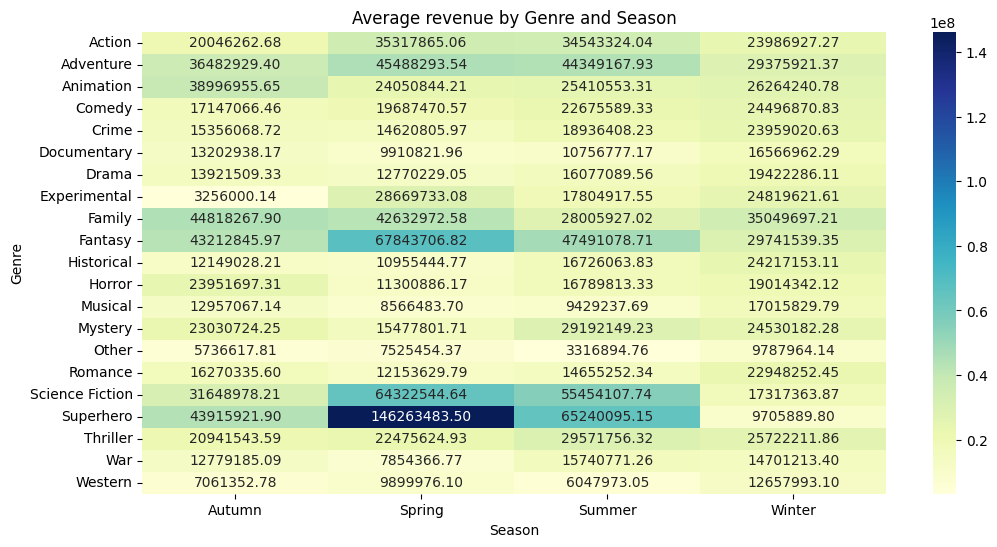

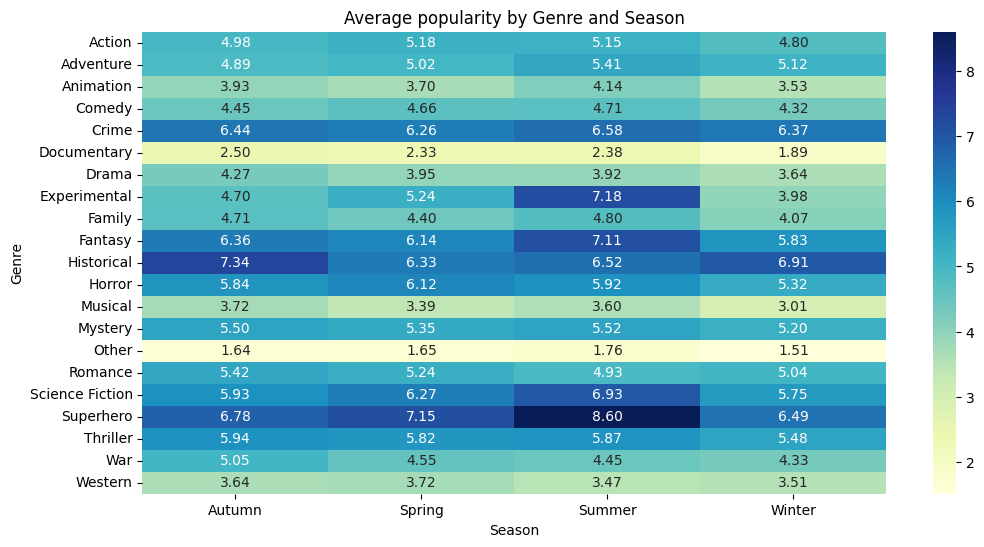

In [71]:
plot_genre_season_performance(genre_season_performance)

What can easily catch our eye is that Fantasy and Science fiction movies have way bigger average revenue in spring, comparing to other seasons. Why is that? Let's test it first:

In [72]:
revenue_ttest(df_seasons)

T-statistic: 0.827878259701446, p-value: 0.4079757121240083


T-statistic (0.83): The T-statistic measures the size of the difference relative to the variation in your sample data. A value close to 0 indicates that there is little difference between the two groups.

p-value (0.41): The p-value tells you the probability of observing the data if the null hypothesis (no difference between the groups) were true. Since the p-value is greater than 0.05, we fail to reject the null hypothesis at a 5% significance level.

We can do one more regression, to check if some of revenue variability is actually explained by a model (that considers genres and seasons, and their relationship):

In [73]:
multiple_regression(df_seasons)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.772
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.46e-71
Time:                        22:32:02   Log-Likelihood:            -3.7751e+05
No. Observations:               19478   AIC:                         7.552e+05
Df Residuals:                   19394   BIC:                         7.558e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

The low R-squared and adjusted R-squared values suggest that this model doesn’t explain much of the variability in revenue.

## Impact of Holidays on the Popularity of Movie Movie genres

* How does a specific holiday influence the popularity of certain Movie genres?
* How does this change over time?
* What is the impact on movie revenue?
* Are there any existing trends?

These are the questions we aim to answer.

**Context**  
We are analyzing the holidays of Christmas, Halloween, and Valentine's Day. During these holidays, the atmosphere shifts, leading people to watch different Movie genres. For instance, during Christmas, audiences seek comfort and typically favor feel-good, family-friendly movies. Halloween is an ideal time for horror films that thrill viewers. And who wouldn’t want to watch a classic romantic movie to surprise their loved ones on Valentine’s Day? While these assumptions seem logical, we intend to verify them using the available dataset.

**Assumptions**  
For our analysis, we focus on movies released after the 1950s, as this period provides a more consistent dataset, and these holidays gained popularity over time. Additionally, we will concentrate on English-speaking Movie countries, where these holidays are most widely celebrated.

Let’s dive into the analysis!

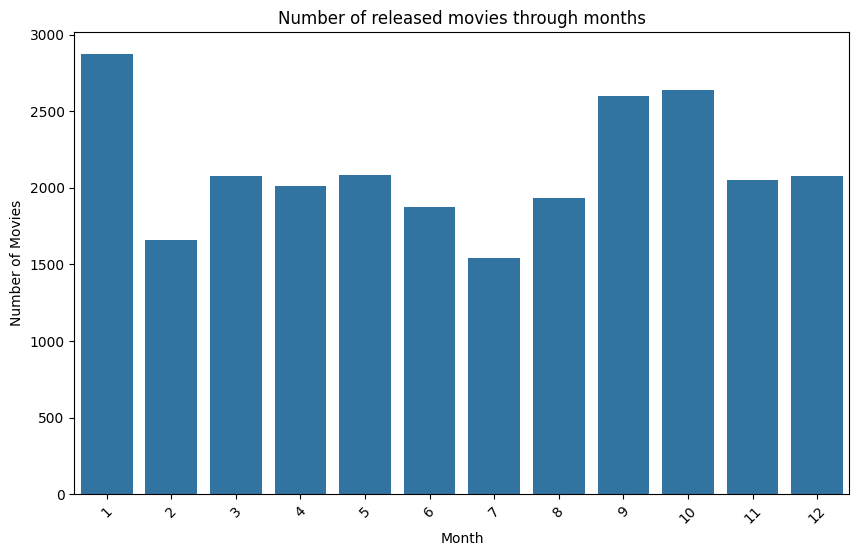

In [74]:
df_month_year, df_full_date = holiday_analysys(df_movies)

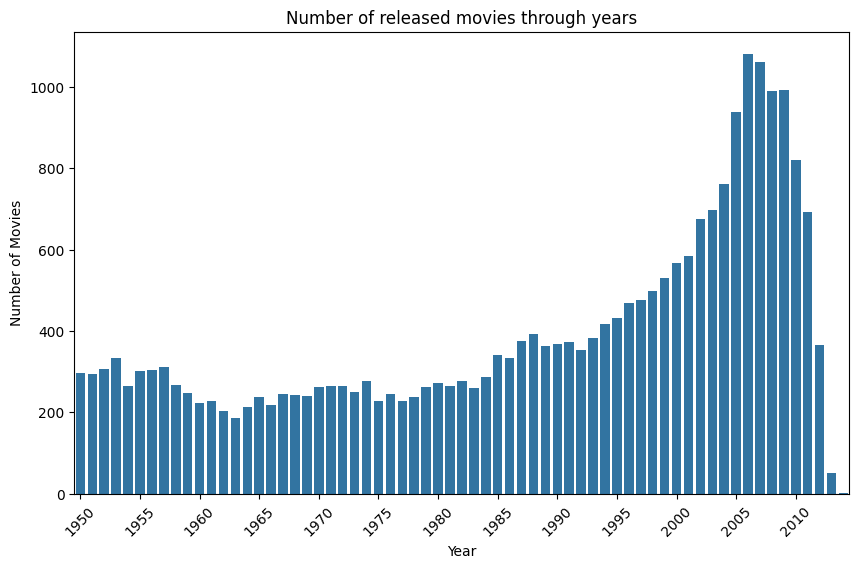

In [75]:
release_year_analysis(df_month_year)

### Family movies during Christmas

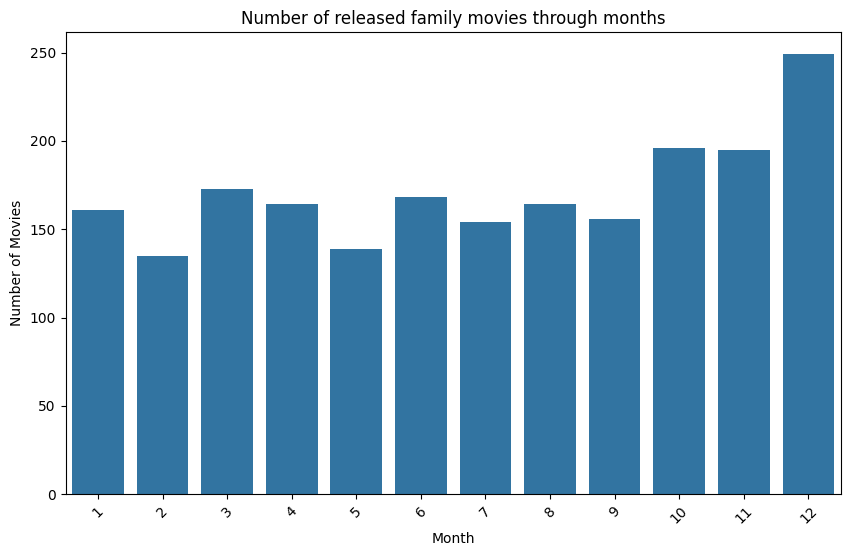

In [76]:
family_movies = family_movies(df_full_date)

Okay, so now we can see that there is an increased amount of family movies released in December. To show that there is a significant statistical distance, we introduced hypothesis test.  

In [77]:
groupby_year_month(family_movies)

Comparison of December with Month 1: p-value = 0.10604985194178358
Comparison of December with Month 2: p-value = 0.0002693899861046275
Comparison of December with Month 3: p-value = 0.045283723284150174
Comparison of December with Month 4: p-value = 0.03529741013497043
Comparison of December with Month 5: p-value = 0.000586020157640322
Comparison of December with Month 6: p-value = 0.010412899731900162
Comparison of December with Month 7: p-value = 0.0008920193142231744
Comparison of December with Month 8: p-value = 0.03766854984432859
Comparison of December with Month 9: p-value = 0.1575929113184334
Comparison of December with Month 10: p-value = 0.22281114499615912
Comparison of December with Month 11: p-value = 0.19559574896805798
December has significantly more family movie releases than  the following months: [2, 3, 4, 5, 6, 7, 8]


 From this we can see that December has significantly more family movie releases than any other month that is not in winter season.
 And if we think about it it makes sense, that movie industry produces movies throughout whole winter season not only around Christmas.

 In next section we try two see relationship between revenue and number of family movies around December.

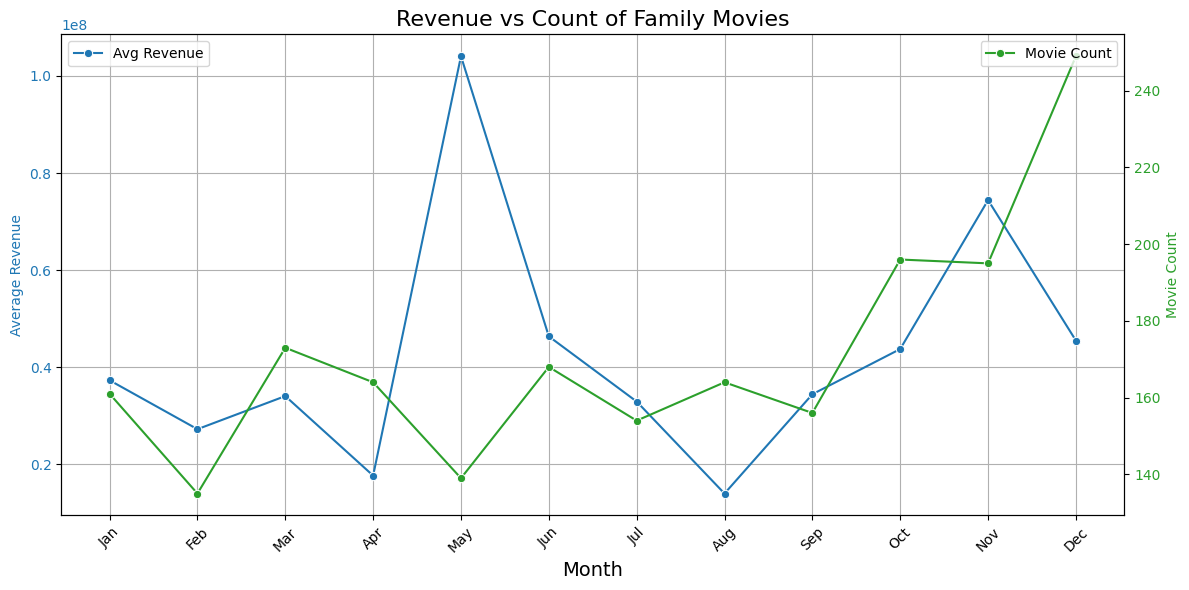

In [78]:
family_trends = family_trends_function(family_movies)

Revenue doesn't tell us much but average sum of movies released in December has a noticeably high peak which confirms are assumptions.
Now, we are using linear regression to see if there exists a trend concerning revenue and number of movies with release month.

In [79]:
family_trends_regression(family_trends)

Slope: 1338055.2480868609
Intercept: 33942667.768323965
R-squared: 0.03791846928694063
P-value: 0.5442057670970595


P value in first part is greater then 0.5, so we can't say that correlation between release month and revenue is statistically significant. But in the second case where we tested correlation between number of family movies and release month - correlation is statistically significant. 



In [80]:
family_trends_correlation(family_trends)

Slope: 5.909090909090908
Intercept: 132.75757575757575
R-squared: 0.48338266657670315
P-value: 0.012067713219175115


In next part we showed the whole month to see possible trends.

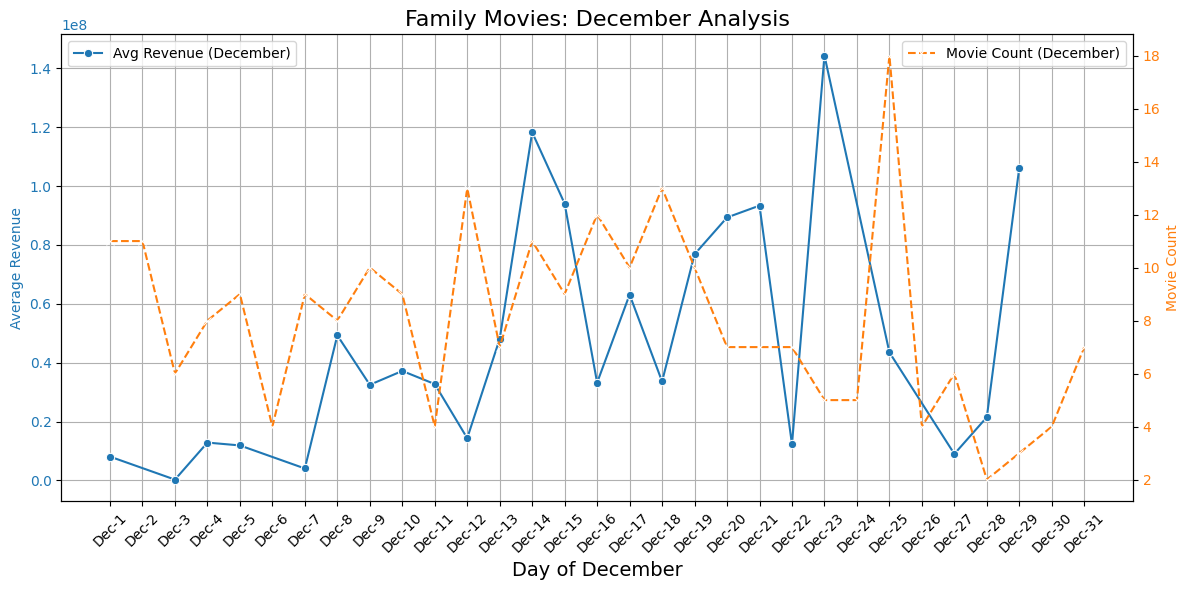

In [81]:
december_trends = family_trends_correlation_plot(family_movies)

Looking at the plot, one can can see that there is a peak around 25th of December, showing that there is increased value of movies realeased exactly on Christmas day.

In [82]:
family_trends_correlation_plot_2(december_trends)

Top 4 Days with Highest Average Revenue in December:
    month  day      revenue  genres
22     12   23  144323373.0       5
13     12   14  118243066.0      11
28     12   29  106269971.0       3
14     12   15   94025383.0       9

Top 4 Days with Highest Movie Count in December:
    month  day     revenue  genres
24     12   25  43503839.5      18
11     12   12  14359151.5      13
17     12   18  33621746.5      13
15     12   16  33208099.0      12


In [83]:
december_correlation_clean(december_trends)

Pearson Correlation: -0.14158663977364166
P-value: 0.4996101958714804


We tried to see if there is important Pearson correlation between revenue and number of movies, but we got p- value larger than 0.05 - no statistical significance.

## Horror movies vs Halloween

From the countplot of Horror movies, there is a significant value in October. Hmm isn't that time for Halloween?

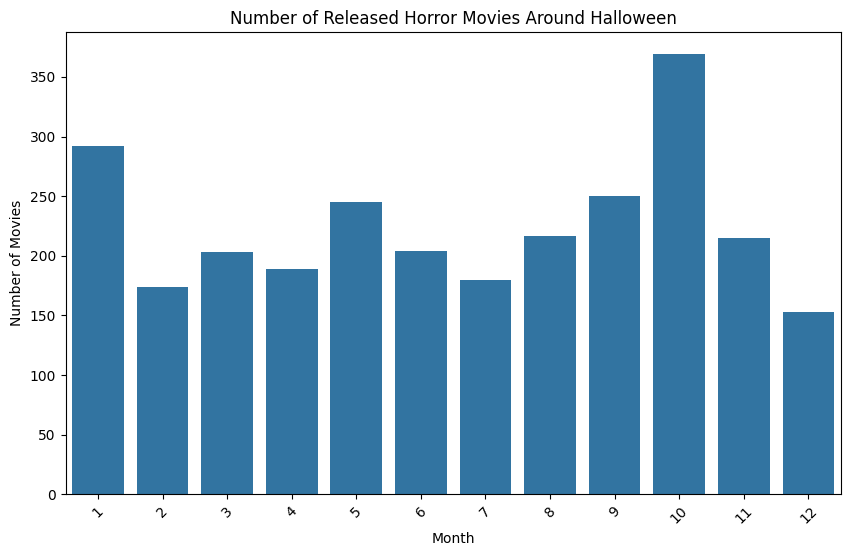

Comparison of October with Month 1: p-value = 0.30306883889016883
Comparison of October with Month 2: p-value = 0.0006639977962069586
Comparison of October with Month 3: p-value = 0.005476531674294278
Comparison of October with Month 4: p-value = 0.001393195653025063
Comparison of October with Month 5: p-value = 0.015540013225062677
Comparison of October with Month 6: p-value = 0.0009211192932808714
Comparison of October with Month 7: p-value = 0.0027026699026941317
Comparison of October with Month 8: p-value = 0.0063037756604256276
Comparison of October with Month 9: p-value = 0.08198779313833489
Comparison of October with Month 11: p-value = 0.024503717087855793
Comparison of October with Month 12: p-value = 0.0001503299436539879
October has significantly more horror movie releases than the following months: [2, 3, 4, 5, 6, 7, 8, 11, 12]


In [84]:
horror_movies = halloween_analysis(df_full_date)
halloween_ttest(horror_movies)

Okay, P test showed us that October is the winner for most of the months. Wohooo....

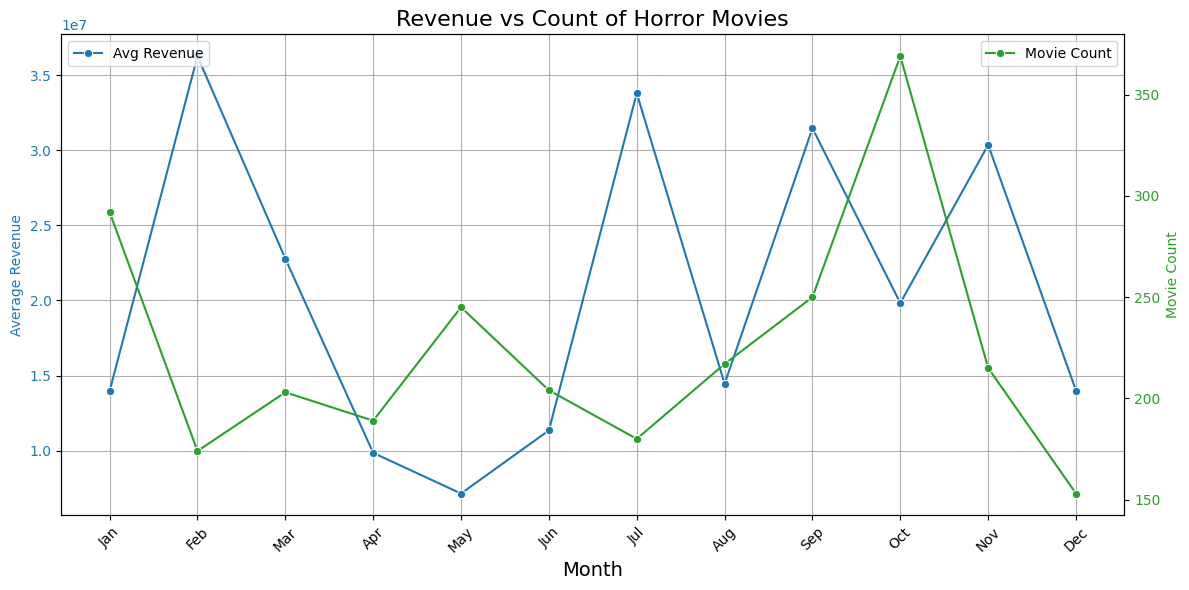

In [85]:
horror_trends = halloween_trends_function(horror_movies)

In [86]:
halloween_trends_correlation(horror_trends)

Pearson Correlation between Revenue and Movie Count: -0.1488487760621186
P-value: 0.6443001459555899


Pearson Correlation coefficient didn't show any statistically important result regarding correlation between Revenue and Movie Count.

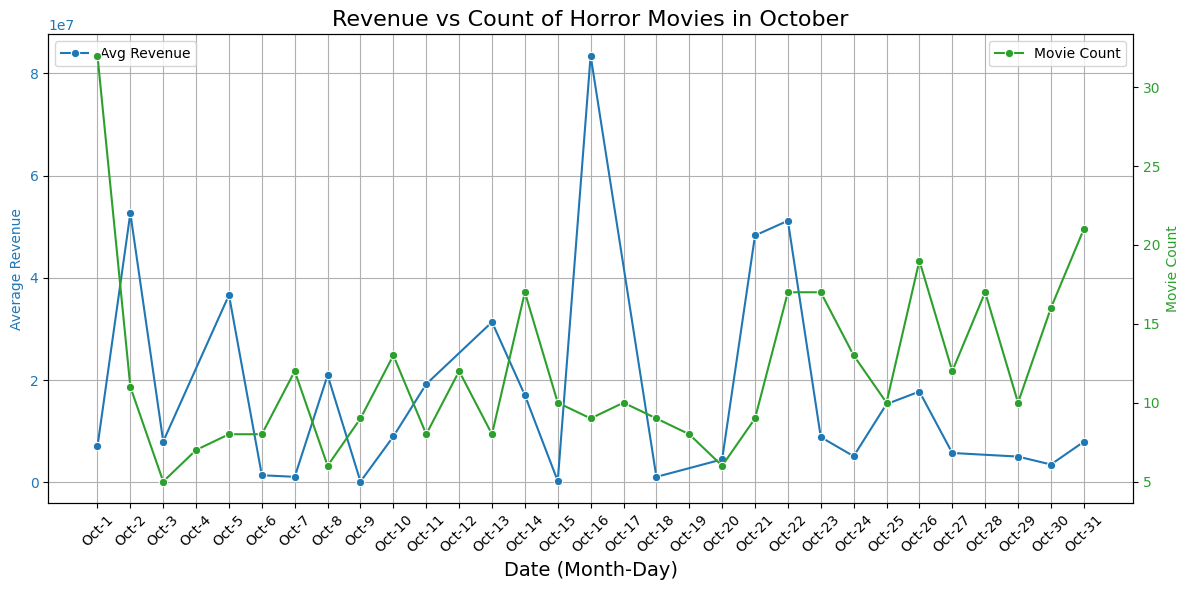

In [87]:
horror_movies_october = halloween_trends(df_full_date)

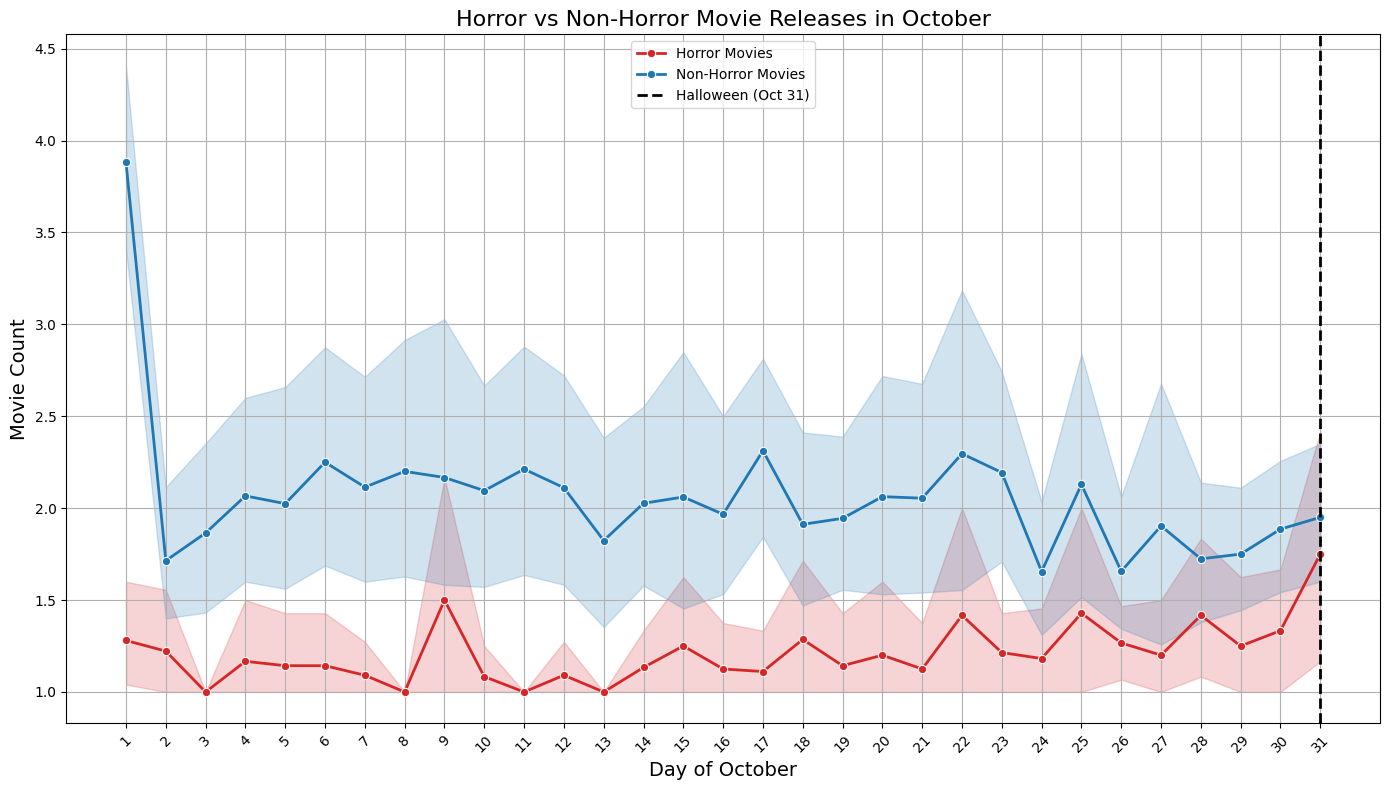

In [88]:
horror_trends, non_horror_trends = horror_nonhorror(horror_movies, df_full_date)

There is a slow rise in movie count at the end of the month as we approach Halloween. We proved this using linear regression where we got small but statistically important positive coefficient.

In [89]:
horror_trends_regression(horror_trends)

Slope: 0.008146568171519876
Intercept: 1.093159744580382
R-squared: 0.020488565844669945
P-value: 0.012924719742072313


## Romantic movies vs Valentine's

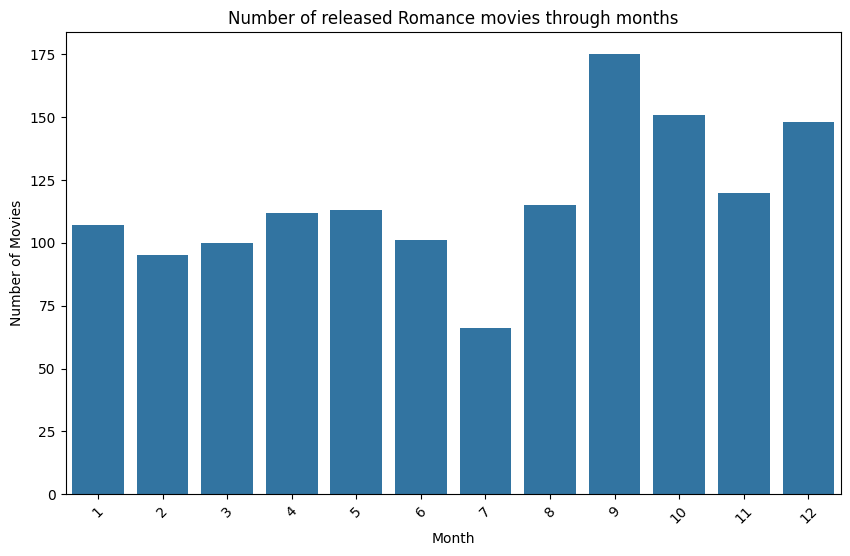

In [90]:
valentine_movies = valentine_analysis(df_full_date)

Unfortunately, there is not clear distinction in February. But let's be sure...

In [91]:
valentine_ttest(valentine_movies)

Comparison of February with Month 1: p-value = 0.17220550987488065
Comparison of February with Month 3: p-value = 0.8868815441952751
Comparison of February with Month 4: p-value = 0.7804272136016993
Comparison of February with Month 5: p-value = 0.5715089171660617
Comparison of February with Month 6: p-value = 0.48738219892797563
Comparison of February with Month 7: p-value = 0.06801705792651881
Comparison of February with Month 8: p-value = 0.8413975870903612
Comparison of February with Month 9: p-value = 0.0037045566993318324
Comparison of February with Month 10: p-value = 0.11603551152455137
Comparison of February with Month 11: p-value = 0.8312773296272358
Comparison of February with Month 12: p-value = 0.21287836118454445
February has significantly more Romance movie releases than the following months: [9]


Like we suspected, February is not that popular for Romance as one would think...

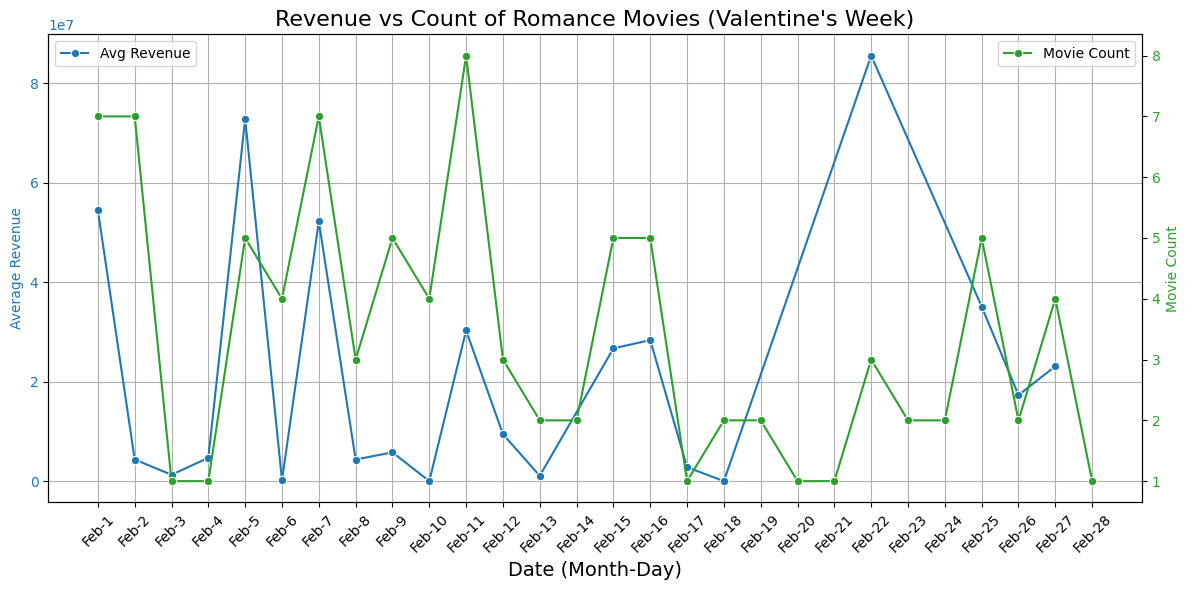

In [92]:
valentines_trends, valentines_period = valentine_trends(df_full_date)

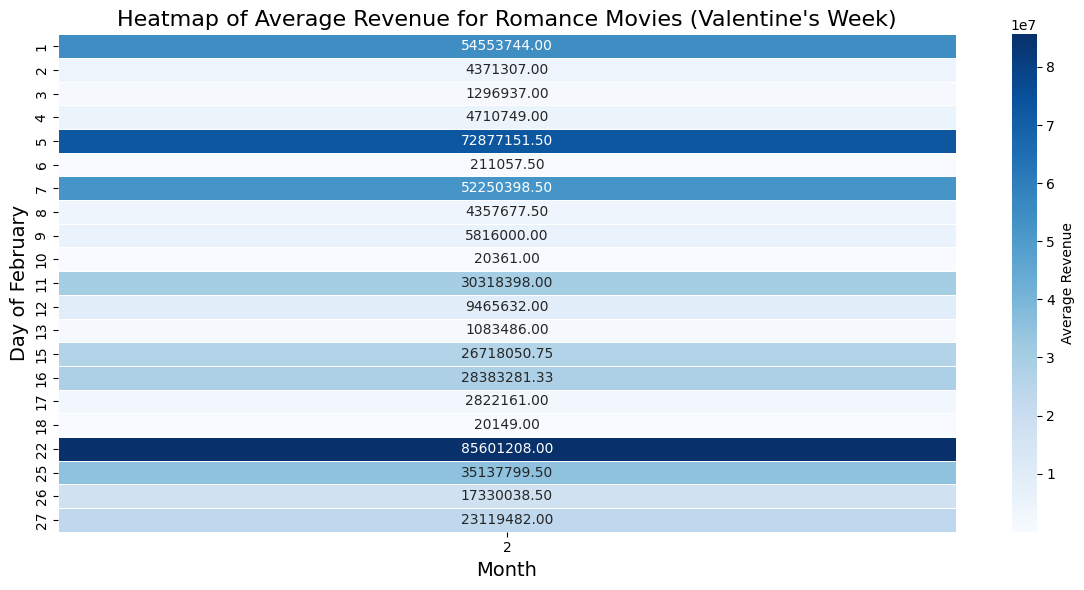

In [93]:
valentine(valentines_period)

Okay, this is optimistic to show that there is an increase in movie revenues not long after 14th of February. Let's do t-test to make sure...

In [94]:
top_days(valentines_trends)

Top 4 Days with Highest Average Revenue in Valentine's Week:


month  day     revenue  genres      date
21      2   22  85601208.0       3  2.0-22.0
4       2    5  72877151.5       5   2.0-5.0
0       2    1  54553744.0       7   2.0-1.0
6       2    7  52250398.5       7   2.0-7.0

In [95]:
top_revenue_days = top_days(valentines_trends)
valentine_ttest_2(valentines_period, top_revenue_days)

Top 4 Days with Highest Average Revenue in Valentine's Week:
Comparison of Day 22 with Other Days: p-value = 0.0588095174464923
Comparison of Day 5 with Other Days: p-value = 0.5016367644056847
Comparison of Day 1 with Other Days: p-value = 0.2477609521288672
Comparison of Day 7 with Other Days: p-value = 0.1727987241041169
Revenue on the top days is not significantly higher than on other days.


Unfortunately, we did't have much success proving that Romance is popular in movie world around Valentine's day. Maybe it is true that Romance is dead... at least it is not popular to watch it during Valentine's

### **Sentiment Analysis of Plot Summaries**

In [96]:
merged_df = load_data_sentiment_analysis()
merged_df = preprocess_data_sentiment_analysis(merged_df)
analyzer = SentimentIntensityAnalyzer()

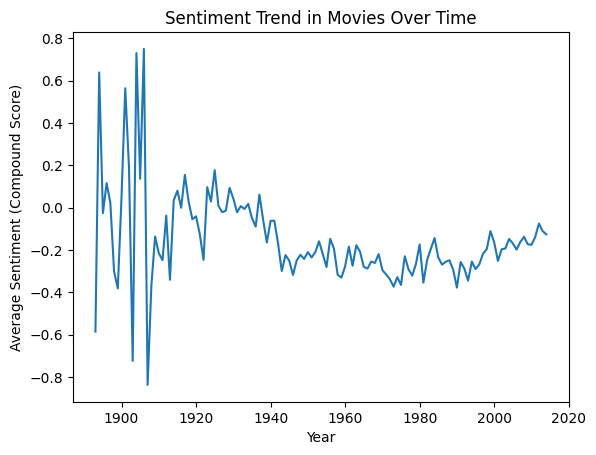

In [97]:
sentiment_trend_over_time(merged_df, analyzer)

In [98]:
statistics(merged_df)

count    34061.000000
mean        -0.197652
std          0.798384
min         -0.999900
25%         -0.963800
50%         -0.565700
75%          0.726900
max          0.999900
Name: sentiment, dtype: float64
Positive summaries: 13268
Neutral summaries: 453
Negative summaries: 20340


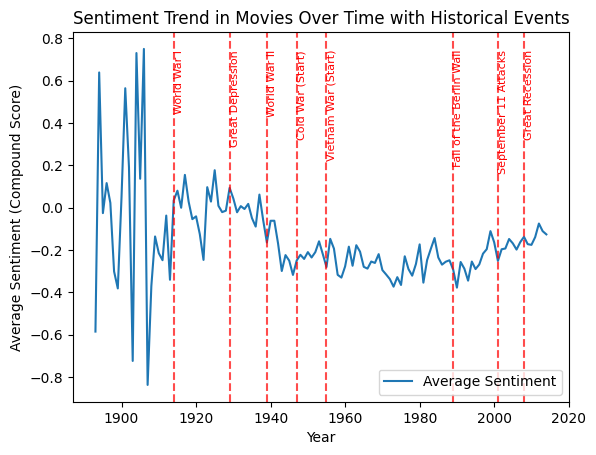

In [99]:
sentiment_trend_with_historical_events(merged_df)

In [100]:
ttest_ind_sentiment(merged_df)


World War I Sentiment Averages:
Before World War I: -0.2117752688172043
During World War I: 0.055437128712871285
After World War I: 0.0026075916230366637

t-test results for World War I:
Before vs During: t-statistic = -3.053875184708673, p-value = 0.002466617373850182
During vs After: t-statistic = 0.8235926028859674, p-value = 0.410508435682821
Before vs After: t-statistic = -2.534625592885422, p-value = 0.01157810567139622
Statistically significant sentiment change from before to during the event.
No statistically significant sentiment change from during to after the event.
Statistically significant sentiment change from before to after the event.

Great Depression Sentiment Averages:
Before Great Depression: -0.010859126984126981
During Great Depression: 0.016158637469586373
After Great Depression: -0.0470904298459043

t-test results for Great Depression:
Before vs During: t-statistic = -0.49012834312180936, p-value = 0.6241433756236049
During vs After: t-statistic = 1.80848800216

Average sentiment during World War II (1939-1945): -0.17376301169590644
Average sentiment before World War II (1930-1938): -0.013315677233429392
Average sentiment after World War II (1946-1955): -0.23193961218836565


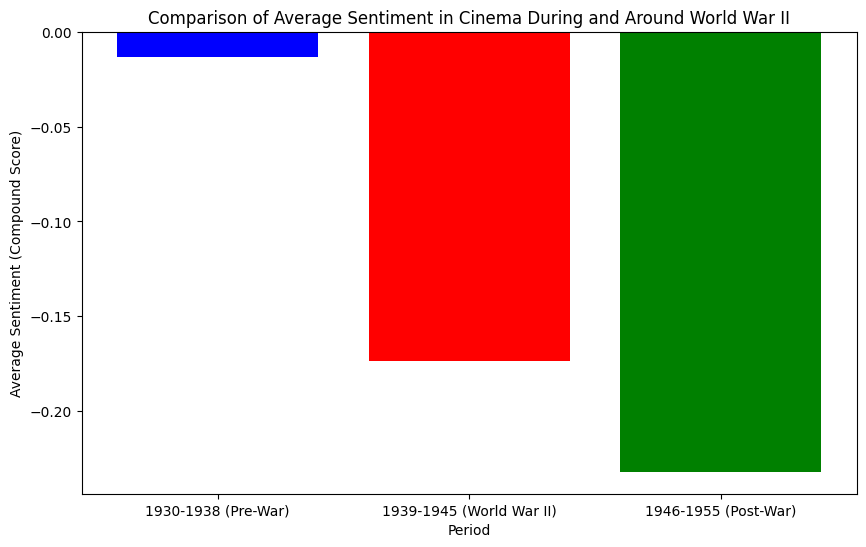

In [101]:
comparison_ww2(merged_df)

In [102]:
stats_sentiment_ww2(merged_df)

Average sentiment before World War II (1930-1938): -0.013315677233429392
Average sentiment during World War II (1939-1945): -0.17376301169590644
Average sentiment after World War II (1946-1955): -0.23193961218836565

t-test between before and during the war:
t-statistic: 5.712397101815154 p-value: 1.2193713001584879e-08

t-test between during and after the war:
t-statistic: 2.155488958165348 p-value: 0.031190947312467295

t-test between before and after the war:
t-statistic: 8.703613618283775 p-value: 4.667289967185057e-18

The difference in sentiment between the period before and during the war is statistically significant.
The difference in sentiment between the period during and after the war is statistically significant.
The difference in sentiment between the period before and after the war is statistically significant.
